# <center>PLANTILLA: APRENDIZAJE NO SUPERVISADO Web Scraping eBay<center>

**Nombre y apellidos: Lorena de la Madrid Descalzo**

**Usuario VIU:**

---
# Contexto
---

<font color="green">Describir el analisis, exploración del dataset muy brevemente*</font>



---
# Inicialización e imports
---

In [5]:
# Imports generales
import pandas as pd
import numpy as np
import io
from google.colab import files


# Semilla aleatoria arbitraria y constante a incluir en los algoritmos estocásticos para que los experimentos sean siempre reproducibles y generen los mismos resultados.
seed = 42

# Funcion de carga de ficheros .csv

def upload_files (index_fields=None):
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), index_col = index_fields)
    return df

In [6]:
# Imports especificos

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import davies_bouldin_score, make_scorer



In [ ]:
# Cargar el conjunto de datos originales resultado de webscraping
dataset0 = upload_files()
print(dataset0.shape)
dataset0.head()

Saving eBay Listados Scraper_electronica.csv to eBay Listados Scraper_electronica.csv
User uploaded file "eBay Listados Scraper_electronica.csv" with length 8495914 bytes
(12600, 8)


Palabra_clave                                           Producto  \
0   auriculares  Andersson TEW-1000 5V 1A 420mAh Tws Carga Fund...   
1   auriculares                             Auriculares A Estrenar   
2   auriculares  Lenovo auriculares inalámbricos XT60, cascos d...   
3   auriculares  XIAOMI MI BASIC AURICULARES INTRAUDITIVOS PLAT...   
4   auriculares  JBL T230NC TWS Auriculares Inalámbricos Blueto...   

                           URL_de_página_de_detalles         Condición  \
0  https://www.ebay.es/itm/156396378186?_skw=auri...             Usado   
1  https://www.ebay.es/itm/296692759127?_skw=auri...  Totalmente nuevo   
2  https://www.ebay.es/itm/387011577213?_skw=auri...  Totalmente nuevo   
3  https://www.ebay.es/itm/233876777623?_skw=auri...  Totalmente nuevo   
4  https://www.ebay.es/itm/387153012373?_skw=auri...  Totalmente nuevo   

                 Precio          Precio_Envío       Localidad  \
0             30,46 EUR  + 11,85 EUR de envío  desde Lituania   
1             14,99 EUR                   NaN             NaN   
2             19,99 EUR                   NaN             NaN   
3              8,90 EUR          Envío gratis             NaN   
4  5,99 EUR a 22,99 EUR          Envío gratis     desde China   

              Fecha_y_hora  
0  2024-09-28 10:34:27.059  
1  2024-09-28 10:34:27.106  
2  2024-09-28 10:34:27.135  
3  2024-09-28 10:34:27.166  
4  2024-09-28 10:34:27.207

In [ ]:
# transformar a minusculas todo el dataset

dataset0 = dataset0.applymap(lambda s: s.lower() if type(s) == str else s)
dataset0.head()

<ipython-input-4-bfdf87e06e54>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataset0 = dataset0.applymap(lambda s: s.lower() if type(s) == str else s)


Palabra_clave                                           Producto  \
0   auriculares  andersson tew-1000 5v 1a 420mah tws carga fund...   
1   auriculares                             auriculares a estrenar   
2   auriculares  lenovo auriculares inalámbricos xt60, cascos d...   
3   auriculares  xiaomi mi basic auriculares intrauditivos plat...   
4   auriculares  jbl t230nc tws auriculares inalámbricos blueto...   

                           URL_de_página_de_detalles         Condición  \
0  https://www.ebay.es/itm/156396378186?_skw=auri...             usado   
1  https://www.ebay.es/itm/296692759127?_skw=auri...  totalmente nuevo   
2  https://www.ebay.es/itm/387011577213?_skw=auri...  totalmente nuevo   
3  https://www.ebay.es/itm/233876777623?_skw=auri...  totalmente nuevo   
4  https://www.ebay.es/itm/387153012373?_skw=auri...  totalmente nuevo   

                 Precio          Precio_Envío       Localidad  \
0             30,46 eur  + 11,85 eur de envío  desde lituania   
1             14,99 eur                   NaN             NaN   
2             19,99 eur                   NaN             NaN   
3              8,90 eur          envío gratis             NaN   
4  5,99 eur a 22,99 eur          envío gratis     desde china   

              Fecha_y_hora  
0  2024-09-28 10:34:27.059  
1  2024-09-28 10:34:27.106  
2  2024-09-28 10:34:27.135  
3  2024-09-28 10:34:27.166  
4  2024-09-28 10:34:27.207

In [ ]:
dataset0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Palabra_clave              12600 non-null  object
 1   Producto                   12600 non-null  object
 2   URL_de_página_de_detalles  12600 non-null  object
 3   Condición                  12600 non-null  object
 4   Precio                     12600 non-null  object
 5   Precio_Envío               12268 non-null  object
 6   Localidad                  11536 non-null  object
 7   Fecha_y_hora               12600 non-null  object
dtypes: object(8)
memory usage: 787.6+ KB



---
# Exploración preliminar y Primeras transformaciones
---

En este apartado se incluyen las transformaciones básicas sobre el dataset para generar un dataset con la informacion relevante para el objetivo: Aplicar tecnicas de aprendizaje No Supervisado.

## Eliminacion de columnas

In [ ]:
# Eliminar columnas innecesarias : URL_de_página_de_detalles y fecha_y_hora(webscraping)
dataset0.drop('URL_de_página_de_detalles', axis = 1, inplace = True)
dataset0.drop('Fecha_y_hora', axis = 1, inplace = True)
dataset0.head()

Palabra_clave                                           Producto  \
0   auriculares  andersson tew-1000 5v 1a 420mah tws carga fund...   
1   auriculares                             auriculares a estrenar   
2   auriculares  lenovo auriculares inalámbricos xt60, cascos d...   
3   auriculares  xiaomi mi basic auriculares intrauditivos plat...   
4   auriculares  jbl t230nc tws auriculares inalámbricos blueto...   

          Condición                Precio          Precio_Envío  \
0             usado             30,46 eur  + 11,85 eur de envío   
1  totalmente nuevo             14,99 eur                   NaN   
2  totalmente nuevo             19,99 eur                   NaN   
3  totalmente nuevo              8,90 eur          envío gratis   
4  totalmente nuevo  5,99 eur a 22,99 eur          envío gratis   

        Localidad  
0  desde lituania  
1             NaN  
2             NaN  
3             NaN  
4     desde china

In [ ]:
# contar el numero de filas que hay por valor del campo palabra_clave

counts = dataset0.groupby('Palabra_clave').size()
print(counts)


Palabra_clave
altavoces                   1800
auriculares                 1800
auriculares inalambricos    1800
cargador                    1800
power bank                  1800
raton                       1800
webcam                      1800
dtype: int64


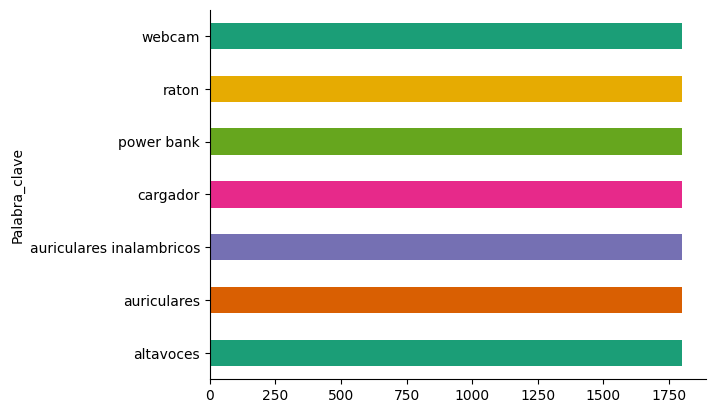

In [ ]:
# Ver la distribucion por tipo de producto: plabra_clave

from matplotlib import pyplot as plt
import seaborn as sns
dataset0.groupby('Palabra_clave').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# eliminar las filas con palabra_clave = auriculares inalambricos

dataset0 = dataset0[~dataset0['Palabra_clave'].isin(['auriculares inalambricos'])]


In [ ]:
counts = dataset0.groupby('Palabra_clave').size()
print(counts)

Palabra_clave
altavoces      1800
auriculares    1800
cargador       1800
power bank     1800
raton          1800
webcam         1800
dtype: int64


In [ ]:
dataset0.shape

(10800, 7)

Tratamiento de los falsos positivos en el proceso de webscraping

In [ ]:
# Identificar las filas que para cada palabra clave, contengan alguna de las palabras identificadas como falso positivo .
#Contar el total de filas y eliminarlas del dataset

# Filtrar las filas que corresponden a cada tipo de producto
df1 = dataset0[dataset0['Palabra_clave'] == 'auriculares']
df2 = dataset0[dataset0['Palabra_clave'] == 'webcam']
df3 = dataset0[dataset0['Palabra_clave'] == 'raton']
df4 = dataset0[dataset0['Palabra_clave'] == 'power bank']
df5 = dataset0[dataset0['Palabra_clave'] == 'altavoces']
df6 = dataset0[dataset0['Palabra_clave'] == 'cargador']

# Crear una máscara booleana para identificar las filas que contienen alguna de las palabras clave
mask1 = df1['Producto'].str.contains('almohadilla|funda|cojines|diadema', case=False, na=False)
mask2 = df2['Producto'].str.contains('tapa|placa|cubierta|cover|sticker|protector|funda|asus', case=False, na=False)
mask3 = df3['Producto'].str.contains('alfombrilla|rueda|wheel|bateria|reparacion', case=False, na=False)
mask4 = df4['Producto'].str.contains('solar|estuche|caja', case=False, na=False)


# Contar el número de filas que cumplen la condición
num_filas_eliminar1 = mask1.sum()
print(f"Número de filas a eliminar de auriculares: {num_filas_eliminar1}")

num_filas_eliminar2 = mask2.sum()
print(f"Número de filas a eliminar de webcam: {num_filas_eliminar2}")

num_filas_eliminar3 = mask3.sum()
print(f"Número de filas a eliminar de raton: {num_filas_eliminar3}")

num_filas_eliminar4 = mask4.sum()
print(f"Número de filas a eliminar de power bank: {num_filas_eliminar4}")






Número de filas a eliminar de auriculares: 211
Número de filas a eliminar de webcam: 413
Número de filas a eliminar de raton: 115
Número de filas a eliminar de power bank: 528


In [ ]:
# Eliminar las filas que cumplen la condición del dataset original
dataset0 = dataset0.drop(df1[mask1].index)
dataset0 = dataset0.drop(df2[mask2].index)
dataset0 = dataset0.drop(df3[mask3].index)
dataset0 = dataset0.drop(df4[mask4].index)
#dataset0 = dataset0.drop(df5[mask5].index)

# Mostrar el dataset actualizado
dataset0.head()
dataset0.shape

(9533, 6)

In [ ]:
counts = dataset0.groupby('Palabra_clave').size()
print(counts)

Palabra_clave
altavoces      1800
auriculares    1589
cargador       1800
power bank     1272
raton          1685
webcam         1387
dtype: int64


**Crear nuevas caracteristicas a traves de la columna producto (descripcion del producto)**

In [ ]:
# Crear una nueva columna: marca, que extraiga el valor del campo producto si contiene una palabra de un array

marcas = ['andersson','lenovo','jbl','jabra','creative','corsair','sony','amazon','pioner','amazfit','android','blackview','sennheiser','philips','bose','oppo','logitech', 'samsung', 'huawei', 'xiaomi', 'apple','silvercrest','sony','asus','nintendo','dell','canon','acer']

def extraer_marca(producto):
  for marca in marcas:
    if marca in producto:
      return marca
  return 'otra'


dataset0['Marca'] = dataset0['Producto'].apply(extraer_marca)

dataset0.head()


Palabra_clave                                           Producto  \
1   auriculares                             auriculares a estrenar   
2   auriculares  lenovo auriculares inalámbricos xt60, cascos d...   
3   auriculares  xiaomi mi basic auriculares intrauditivos plat...   
4   auriculares  jbl t230nc tws auriculares inalámbricos blueto...   
6   auriculares  auriculares inalámbricos f9 tws con bluetooth,...   

          Condición                Precio  Precio_Envío    Localidad   Marca  
1  totalmente nuevo             14,99 eur           NaN          NaN    otra  
2  totalmente nuevo             19,99 eur           NaN          NaN  lenovo  
3  totalmente nuevo              8,90 eur  envío gratis          NaN  xiaomi  
4  totalmente nuevo  5,99 eur a 22,99 eur  envío gratis  desde china     jbl  
6  totalmente nuevo              9,99 eur  envío gratis          NaN    otra

In [ ]:
# contar filas por valor del atributo marca

counts_marca = dataset0.groupby('Marca').size()
print(counts_marca)


Marca
acer             57
amazfit           9
amazon            8
andersson         1
android          99
apple           115
asus             31
blackview         3
bose            156
canon             4
corsair           9
creative          6
dell             44
huawei           72
jabra            27
jbl              74
lenovo          103
logitech        254
nintendo         11
oppo             10
otra           7658
philips          22
samsung         429
sennheiser       52
silvercrest       2
sony            181
xiaomi           96
dtype: int64


In [ ]:
# Eliminar columna producto tras extraer el conocimiento necesario de ella:
dataset0.drop('Producto', axis = 1, inplace = True)
dataset0.head()

Palabra_clave         Condición                Precio  Precio_Envío  \
1   auriculares  totalmente nuevo             14,99 eur           NaN   
2   auriculares  totalmente nuevo             19,99 eur           NaN   
3   auriculares  totalmente nuevo              8,90 eur  envío gratis   
4   auriculares  totalmente nuevo  5,99 eur a 22,99 eur  envío gratis   
6   auriculares  totalmente nuevo              9,99 eur  envío gratis   

     Localidad   Marca  
1          NaN    otra  
2          NaN  lenovo  
3          NaN  xiaomi  
4  desde china     jbl  
6          NaN    otra

In [ ]:
# descargar en csv el dataset con las primeras transformaciones

dataset0.to_csv('dataset_transformado.csv', encoding='utf-8')
files.download('dataset_transformado.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Transformaciones de texto




**Transformaciones en el atributo precio**

In [ ]:
# Eliminar EUR de los valores de la columna precio

dataset0['Precio'] = dataset0['Precio'].str.replace('eur', '', regex=False)


In [ ]:
# Función para extraer los valores max y min del precio
def extraer_valores_precio(precio):

    precio = precio.strip().replace('.', '').replace(',', '.')

    if ' a ' in precio:
        precio_min = float(precio.split(' a ')[0])  # Extrae el valor antes de 'a'
        precio_max = float(precio.split(' a ')[1])     # Extrae el valor después de 'a'
        return precio_min, precio_max
    else:
        return float(precio), float(precio)  # Mantiene el valor original en ambas columnas

# Aplicar la función y crear nuevas columnas
dataset0[['precio_min', 'precio_max']] = dataset0['Precio'].apply(extraer_valores_precio).apply(pd.Series)

# Calcular el valor medio
dataset0['precio_medio'] = ((dataset0['precio_min'] + dataset0['precio_max']) / 2).round().astype(int)


In [ ]:
# Eliminar columnas innecesarias tras la generacion del atributo precio_medio
dataset0.drop('Precio', axis = 1, inplace = True)
dataset0.drop('precio_min', axis = 1, inplace = True)
dataset0.drop('precio_max', axis = 1, inplace = True)

**Transformaciones del atributo precio_envio**

In [ ]:
# Eliminar palabras innecesarias de los valores de la columna precio_envio
dataset0['Precio_Envío'] = dataset0['Precio_Envío'].str.replace(r'envío|en|eur|de|no|especificado|estimado|\+', '', regex=True)

# Transformacion para float
dataset0['Precio_Envío'] = dataset0['Precio_Envío'].str.replace(',', '.')



In [ ]:
def validar_y_limpiar_precio(precio_envio):
    if isinstance(precio_envio, str):  # Check if the value is a string before using string methods
        if precio_envio == ' gratis':
            return 0  # 0 para representar gratis
        elif precio_envio.strip() == '':
            return float('nan')
        else:
            try:
                return float(precio_envio)
            except ValueError:
                return float('nan')  # para los casos de errores
    elif isinstance(precio_envio, float):
        if precio_envio == float('nan'):
            return float('nan')
        else:
            return precio_envio
    else:
        return float('nan') # Handle other data types if present by converting to NaN

# Aplicar la función a la columna precio_envio
dataset0['precio_envio_limpio'] = (dataset0['Precio_Envío']).apply(validar_y_limpiar_precio)


In [ ]:
# Redondear y convertir a entero, manteniendo nulos
dataset0['precio_envio_int'] = dataset0['precio_envio_limpio'].apply(
    lambda x: int(round(x)) if pd.notnull(x) else pd.NA
)

# Convertir a tipo entero (Int64) para manejar NaN
dataset0['precio_envio_int'] = dataset0['precio_envio_int'].astype('Int64')


Transformaciones variable localidad

In [ ]:
# Eliminar "desde" de los valores de la columna Localidad

dataset0['Localidad'] = dataset0['Localidad'].str.replace('desde ', '', regex=False)


In [ ]:
# Eliminar columnas innecesarias tras la generacion del atributo precio_medio
dataset0.drop('Precio_Envío', axis = 1, inplace = True)
dataset0.drop('precio_envio_limpio', axis = 1, inplace = True)

In [ ]:
dataset0.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9533 entries, 1 to 12599
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Palabra_clave     9533 non-null   object
 1   Condición         9533 non-null   object
 2   Localidad         8576 non-null   object
 3   Marca             9533 non-null   object
 4   precio_medio      9533 non-null   int64 
 5   precio_envio_int  9049 non-null   Int64 
dtypes: Int64(1), int64(1), object(4)
memory usage: 530.6+ KB


In [ ]:
# descargar en csv el dataset con las transformaciones

dataset0.to_csv('dataset_transformado2.csv', encoding='utf-8')
files.download('dataset_transformado2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

*Validadas las distintas transformaciones en las iteraciones de ejecución intermedias.*

# **Exploracion de los nulos**

**Exploracion general para todos los atributos**

In [ ]:
# Calcular el porcentaje de valores nulos por columna
null_percentage = dataset0.isnull().mean() * 100

# Imprimir el porcentaje de nulos por atributo
print("Porcentaje de valores nulos por atributo:")
print(null_percentage)

Porcentaje de valores nulos por atributo:
Palabra_clave        0.000000
Condición            0.000000
Localidad           10.038813
Marca                0.000000
precio_medio         0.000000
precio_envio_int     5.077101
dtype: float64


Solo existen valores nulos en los atributos, localidad y precio_envio

**Se analizan en profundidad los atributos con nulos**

Atributo: localidad

In [ ]:
cantidad_nulos = len(dataset0['Localidad']) - dataset0['Localidad'].count() # Conteo de nulos

if cantidad_nulos > 0:
    print(f"Cantidad de nulos en el atributo Localidad: {cantidad_nulos}\n") # Impresión de la cantidad de nulos
else:
    print("No existen filas con valores nulos para este atributo.\n")

Cantidad de nulos en el atributo Localidad: 957



In [ ]:
# Calcular el porcentaje de valores nulos por localidad
null_percentage_by_localidad = dataset0.groupby('Localidad').apply(lambda x: x.isnull().mean() * 100)

# Imprimir el porcentaje de nulos por localidad
print("Porcentaje de valores nulos por localidad:")
print(null_percentage_by_localidad)

Porcentaje de valores nulos por localidad:
                        Palabra_clave  Condición  Localidad  Marca  \
Localidad                                                            
alemania                          0.0        0.0        0.0    0.0   
australia                         0.0        0.0        0.0    0.0   
austria                           0.0        0.0        0.0    0.0   
bulgaria                          0.0        0.0        0.0    0.0   
bélgica                           0.0        0.0        0.0    0.0   
canadá                            0.0        0.0        0.0    0.0   
china                             0.0        0.0        0.0    0.0   
corea del sur                     0.0        0.0        0.0    0.0   
croacia                           0.0        0.0        0.0    0.0   
dinamarca                         0.0        0.0        0.0    0.0   
emiratos árabes unidos            0.0        0.0        0.0    0.0   
eslovaquia                        0.0        0.

<ipython-input-32-1eb37e39da9c>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  null_percentage_by_localidad = dataset0.groupby('Localidad').apply(lambda x: x.isnull().mean() * 100)


Se encuentran la mayoria para la localidad Canada y Alemania.

Atributo: precio_envio

In [ ]:
cantidad_nulos = len(dataset0['precio_envio_int']) - dataset0['precio_envio_int'].count() # Conteo de nulos

if cantidad_nulos > 0:
    print(f"Cantidad de nulos en el atributo precio_envio: {cantidad_nulos}\n") # Impresión de la cantidad de nulos
else:
    print("No existen filas con valores nulos para este atributo.\n")

Cantidad de nulos en el atributo precio_envio: 484



**Procesamiento para los valores nulos**

In [ ]:
dataset0.fillna('Desconocido', inplace=True)

# **Verificacion de la calidad de los datos**

  En base al conocimiento experto del dominio reflejado en las tablas de la memoria

Calidad del atributo precio

In [ ]:
#Verificar que los valores del atributo se encuentren dentro de rango

# Se identifica y cuenta a los valores que no cumplen la condición definida.

resultado = dataset0[dataset0['precio_medio'] > 1500]
resultado2 = dataset0[dataset0['precio_medio'] < 9]

print("Se visualizan las filas con errores de rango:")
display(resultado) # Para visualizar las tuplas con valores nulos o erróneos
display(resultado2)
print(f"Cantidad detectada precios aparentemente altos: {resultado.shape[0]}")
print(f"Cantidad detectada precios aparentemente bajos: {resultado2.shape[0]}")

Se visualizan las filas con errores de rango:


Palabra_clave             Condición       Localidad Marca  precio_medio  \
1224    auriculares      totalmente nuevo           japón  sony          1675   
3723    auriculares      totalmente nuevo           japón  sony          1517   
5185      altavoces                 usado        alemania  otra          1600   
5662      altavoces  nuevo (de otro tipo)  estados unidos  otra          1910   
9894      altavoces  nuevo (de otro tipo)        alemania  otra          2399   
10350     altavoces                 usado          italia  otra          1750   

       precio_envio_int  
1224                  0  
3723                  0  
5185                600  
5662                192  
9894                  0  
10350                60

Palabra_clave         Condición Localidad     Marca  precio_medio  \
8       auriculares  totalmente nuevo       NaN      otra             1   
11      auriculares  totalmente nuevo       NaN      otra             1   
16      auriculares  totalmente nuevo       NaN      otra             2   
17      auriculares  totalmente nuevo       NaN  nintendo             6   
20      auriculares  totalmente nuevo       NaN      otra             4   
...             ...               ...       ...       ...           ...   
12590      cargador  totalmente nuevo     china    huawei             5   
12591      cargador  totalmente nuevo     china    huawei             4   
12593      cargador  totalmente nuevo     china   samsung             8   
12594      cargador  totalmente nuevo     china      otra             2   
12595      cargador  totalmente nuevo     china      otra             7   

       precio_envio_int  
8                     3  
11                    3  
16                    0  
17                    2  
20                    3  
...                 ...  
12590                 0  
12591                 4  
12593                 0  
12594                 0  
12595                 0  

[2090 rows x 6 columns]

Cantidad detectada precios aparentemente altos: 6
Cantidad detectada precios aparentemente bajos: 2090


Calidad del atributo precio_envio

In [ ]:
#Verificar que los valores del atributo se encuentren dentro de rango

# Se identifica y cuenta a los valores que no cumplen la condición definida. Esta condicion nos la podría dar el experto del dominio

resultado = dataset0[dataset0['precio_envio_int'] > 100]

print("Se visualizan las filas con errores de rango:")
display(resultado) # Para visualizar las tuplas con valores nulos o erróneos

print(f"Cantidad detectada con precios de envio aparentemente erroneos o fuera de rango: {resultado.shape[0]}")

Se visualizan las filas con errores de rango:


Palabra_clave             Condición       Localidad Marca  precio_medio  \
477          webcam  nuevo (de otro tipo)  estados unidos  otra             8   
975          webcam                 usado  estados unidos  otra             3   
5168      altavoces                 usado  estados unidos  otra            43   
5185      altavoces                 usado        alemania  otra          1600   
5389      altavoces      totalmente nuevo  estados unidos  otra           250   
...             ...                   ...             ...   ...           ...   
11624     altavoces  nuevo (de otro tipo)  estados unidos  otra            64   
11632     altavoces      totalmente nuevo  estados unidos  otra           357   
11636     altavoces                 usado  estados unidos  sony            76   
11678     altavoces                 usado  estados unidos  otra            76   
11687     altavoces  nuevo (de otro tipo)  estados unidos  otra           124   

       precio_envio_int  
477                 403  
975                 591  
5168                114  
5185                600  
5389                129  
...                 ...  
11624               106  
11632               207  
11636               127  
11678               116  
11687               107  

[124 rows x 6 columns]

Cantidad detectada con precios de envio aparentemente erroneos o fuera de rango: 124


# **Categorizacion de las variables numericas**

Categorizar el atributo precio

In [ ]:
# Categorizar el atribiuto precio: rangos de precios
def clasificar_precio(precio):
    if precio == 0:  # Representa "gratis"
        return 'gratis'
    elif precio >= 500:
        return 'muy caro'
    elif 51 <= precio <= 499:
        return 'caro'
    elif 21 <= precio <= 50:
        return 'medio'
    elif 20 >= precio >= 11:
        return 'barato'
    elif 10 >= precio >= 1:
        return 'muy barato'
    # Manejar los casos NaN:
    else:
        return 'desconocido'


dataset0['rango_precio'] = dataset0['precio_medio'].apply(clasificar_precio)

rango_precio
muy barato    3083
barato        2854
medio         2082
caro          1479
muy caro        35
Name: count, dtype: int64


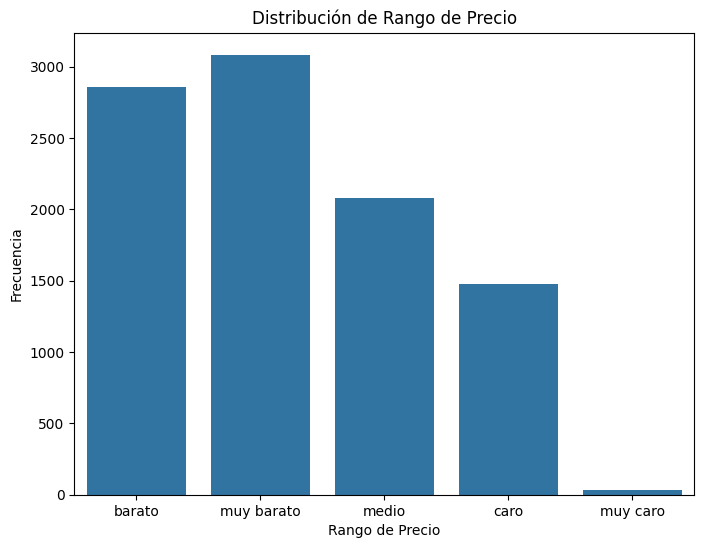

In [ ]:
# Distribución de valores para la variable rango_precio
rango_precio_counts = dataset0['rango_precio'].value_counts()
print(rango_precio_counts)

# Gráfico de barras para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.countplot(x='rango_precio', data=dataset0)
plt.title('Distribución de Rango de Precio')
plt.xlabel('Rango de Precio')
plt.ylabel('Frecuencia')
plt.show()

Categorizar el atributo precio del envío

In [ ]:
# Obtener estadísticas descriptivas del atributo precio_envio_int
stats_precio_envio = dataset0['precio_envio_int'].describe()

print("Estadísticas del atributo precio_envio_int:")
print(stats_precio_envio)

Estadísticas del atributo precio_envio_int:
count       9049.0
mean     12.626699
std      26.350908
min            0.0
25%            0.0
50%            4.0
75%           15.0
max          826.0
Name: precio_envio_int, dtype: Float64


In [ ]:

# Categorizar el atribiuto precio de envio: rangos de precios
def clasificar_precio2(precio_envio):
    if precio_envio == 0:  # Representa "gratis"
        return 'gratis'
    elif precio_envio >= 100:
        return 'muy caro'
    elif 21 <= precio_envio <= 99:
        return 'caro'
    elif 5 <= precio_envio <= 20:
        return 'medio'
    elif 4 >= precio_envio >= 1:
        return 'barato'
    # Manejar los casos NaN:
    else:
        return 'desconocido'


dataset0['rango_precio_envio'] = dataset0['precio_envio_int'].apply(clasificar_precio2)


rango_precio_envio
gratis         3160
medio          2652
barato         1635
caro           1477
desconocido     484
muy caro        125
Name: count, dtype: int64


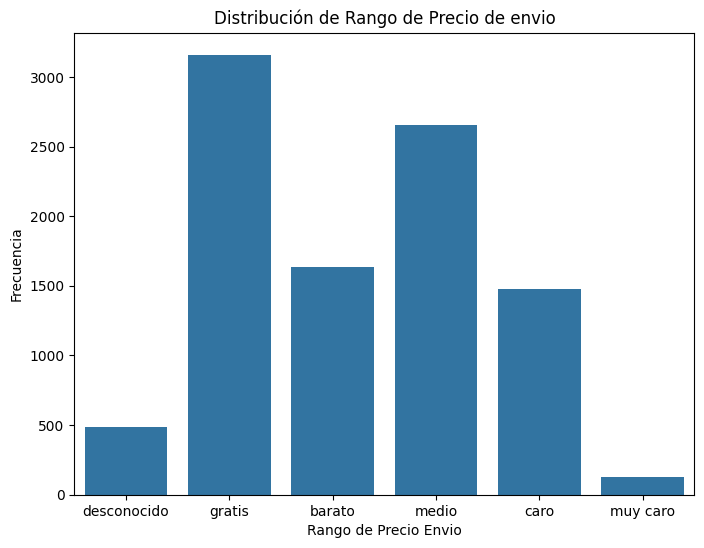

In [ ]:
# Distribución de valores para la variable rango_precio
rango_precio_counts = dataset0['rango_precio_envio'].value_counts()
print(rango_precio_counts)

# Gráfico de barras para visualizar la distribución
plt.figure(figsize=(8, 6))
sns.countplot(x='rango_precio_envio', data=dataset0)
plt.title('Distribución de Rango de Precio de envio')
plt.xlabel('Rango de Precio Envio')
plt.ylabel('Frecuencia')
plt.show()

Eliminacion de los atributos intermedios

In [ ]:
dataset0.head()

Palabra_clave         Condición Localidad   Marca  precio_medio  \
1   auriculares  totalmente nuevo       NaN    otra            15   
2   auriculares  totalmente nuevo       NaN  lenovo            20   
3   auriculares  totalmente nuevo       NaN  xiaomi             9   
4   auriculares  totalmente nuevo     china     jbl            14   
6   auriculares  totalmente nuevo       NaN    otra            10   

   precio_envio_int rango_precio rango_precio_envio  
1              <NA>       barato        desconocido  
2              <NA>       barato        desconocido  
3                 0   muy barato             gratis  
4                 0       barato             gratis  
6                 0   muy barato             gratis

In [ ]:
# Eliminar columnas innecesarias tras la generacion del atributo precio_medio
dataset0.drop('precio_envio_int', axis = 1, inplace = True)
dataset0.drop('precio_medio', axis = 1, inplace = True)

**RENOMBRAR ATRIBUTOS**

In [ ]:
dataset0.rename(columns={'Palabra_clave': 'Tipo_producto', 'rango_precio_envio':'precio_envio','rango_precio':'precio'}, inplace=True)
dataset0.head()

Tipo_producto         Condición Localidad   Marca      precio precio_envio
1   auriculares  totalmente nuevo       NaN    otra      barato  desconocido
2   auriculares  totalmente nuevo       NaN  lenovo      barato  desconocido
3   auriculares  totalmente nuevo       NaN  xiaomi  muy barato       gratis
4   auriculares  totalmente nuevo     china     jbl      barato       gratis
6   auriculares  totalmente nuevo       NaN    otra  muy barato       gratis

In [ ]:
# descargar en csv el dataset con las transformaciones

dataset0.to_csv('dataset_transformado_final.csv', encoding='utf-8')
files.download('dataset_transformado_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Exploracion del dataset final**

## **Estadisticos y distribución de los atributos**

**Estadisticos atributos**

In [ ]:
# Estadísticos descriptivos para atributos numéricos
print(dataset0.describe())


       Tipo_producto         Condición Localidad Marca      precio  \
count           9533              9533      8576  9533        9533   
unique             6                 6        37    27           5   
top        altavoces  totalmente nuevo     china  otra  muy barato   
freq            1800              7275      3615  7658        3083   

       precio_envio  
count          9533  
unique            6  
top          gratis  
freq           3160  


**Histogramas: Distribucion de valores**

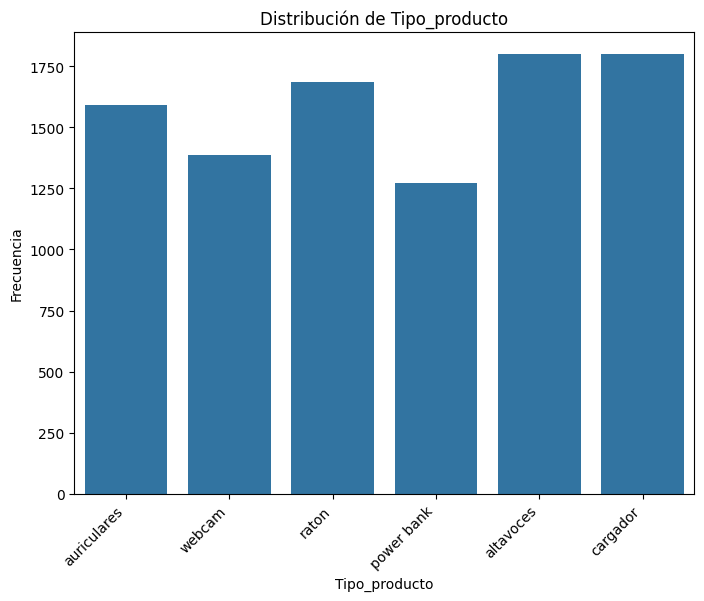

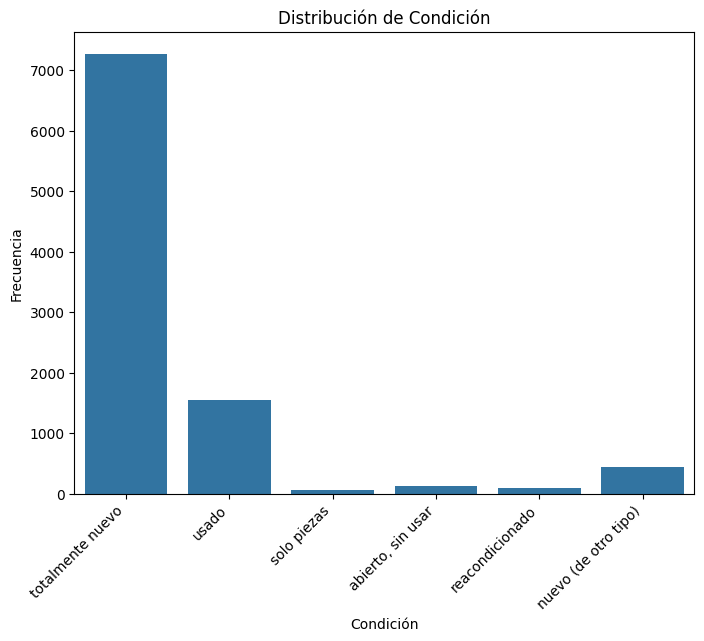

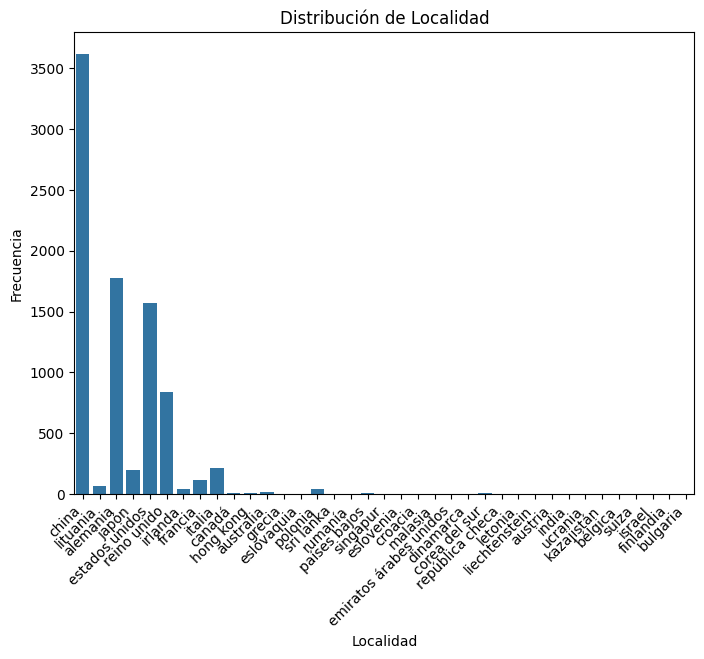

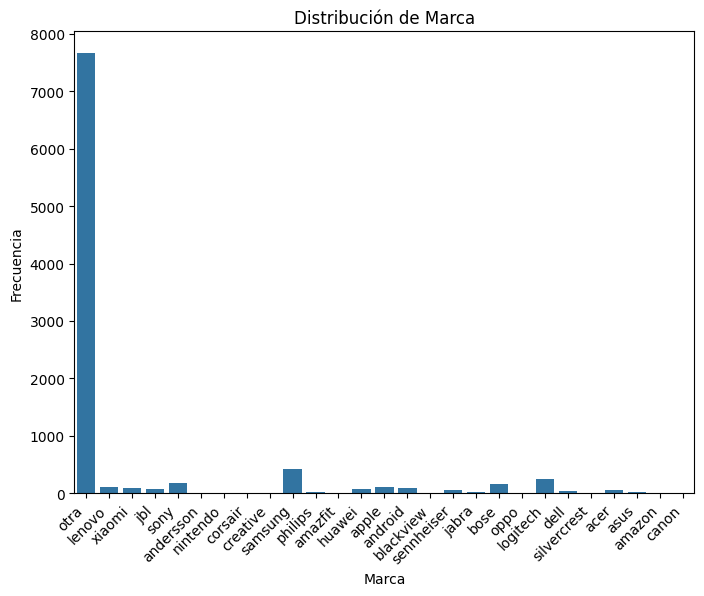

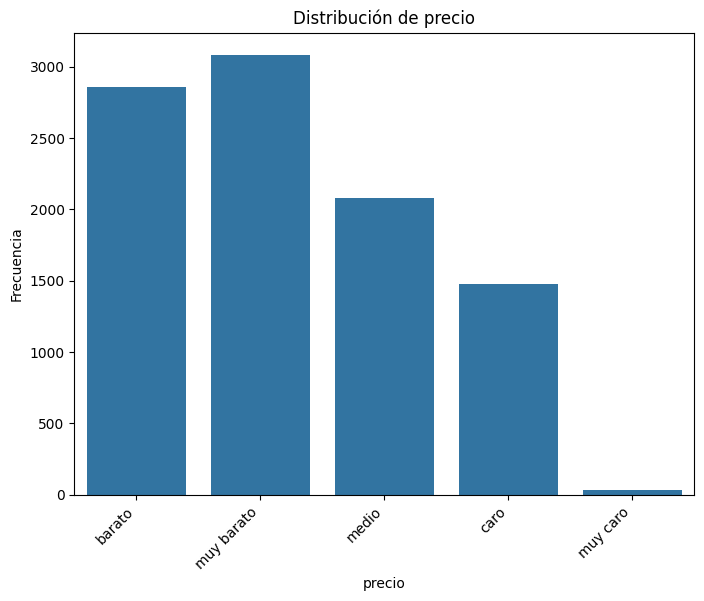

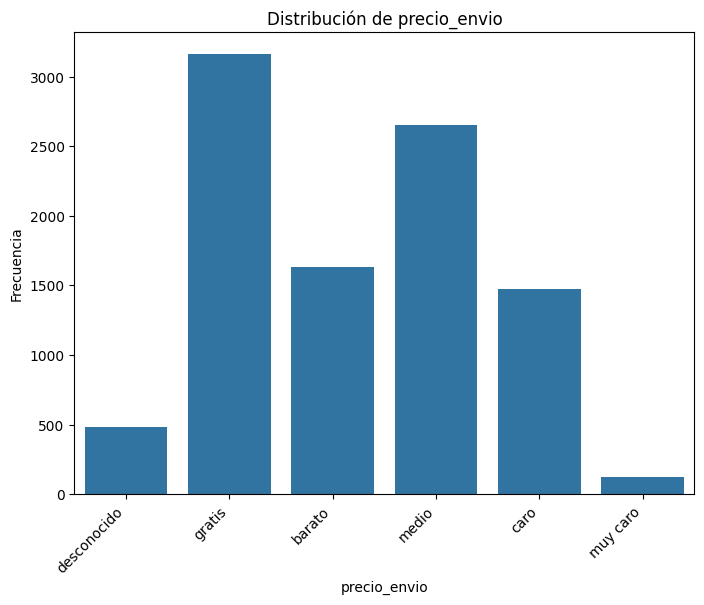

In [ ]:
# Distribución de valores para cada atributo numérico
for column in dataset0.select_dtypes(include=np.number):
  plt.figure(figsize=(8, 6))
  sns.histplot(dataset0[column], kde=True)
  plt.title(f'Distribución de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.show()

# Distribución de valores para cada atributo categórico
for column in dataset0.select_dtypes(include=['object', 'category']):
  plt.figure(figsize=(8, 6))
  sns.countplot(x=column, data=dataset0)
  plt.title(f'Distribución de {column}')
  plt.xlabel(column)
  plt.ylabel('Frecuencia')
  plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
  plt.show()

**Analisis de relacion entre las variables categoricas**

Analisis general para todos los pares de atributos

In [ ]:
atributos = dataset0.columns.tolist()
atributos

['Tipo_producto', 'Condición', 'Localidad', 'Marca', 'precio', 'precio_envio']

In [ ]:
# Inicializar la variable de resultados
results = []

# Calcular tablas de contingencia y realizar pruebas Chi-Cuadrado
for i in range(len(atributos)):
    for j in range(i + 1, len(atributos)):
        var1 = atributos[i]
        var2 = atributos[j]

        # Crear tabla de contingencia
        contingency_table = pd.crosstab(dataset0[var1], dataset0[var2])

        # Realizar prueba Chi-Cuadrado
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Almacenar resultados
        results.append({
            "Variable 1": var1,
            "Variable 2": var2,
            "Chi2": chi2,
            "p-valor": p,
            "Tabla de Contingencia": contingency_table
        })

# Convertir resultados a DataFrame para facilitar la visualización
results_relaciones_df = pd.DataFrame(results)


In [ ]:
results_relaciones_df.head()

Variable 1    Variable 2         Chi2  p-valor  \
0  Tipo_producto     Condición  2104.686958      0.0   
1  Tipo_producto     Localidad  4219.046579      0.0   
2  Tipo_producto         Marca  3309.042943      0.0   
3  Tipo_producto        precio  3094.995878      0.0   
4  Tipo_producto  precio_envio  3867.395659      0.0   

                               Tabla de Contingencia  
0  Condición      abierto, sin usar  nuevo (de ot...  
1  Localidad      alemania  australia  austria  b...  
2  Marca          acer  amazfit  amazon  andersso...  
3  precio         barato  caro  medio  muy barato...  
4  precio_envio   barato  caro  desconocido  grat...

In [ ]:
# descargar en csv los resultados del analisis de relaciones

results_relaciones_df.to_csv('dataset_analisis_relaciones.csv', encoding='utf-8')
files.download('dataset_analisis_relaciones.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ánalisis de los resultados y aplicar valores significativos

In [ ]:
# Filtrar relaciones significativas (Se selecciona: p-valor < 0.05)
significant_relationships = results_relaciones_df[results_relaciones_df['p-valor'] < 0.05]

# Mostrar resultados significativos
print("Relaciones significativas entre pares de variables:")
print(significant_relationships[['Variable 1', 'Variable 2', 'Chi2', 'p-valor']])

# Mostrar tablas de contingencia para relaciones significativas
#for index, row in significant_relationships.iterrows():
    #print(f"\nTabla de Contingencia entre {row['Variable 1']} y {row['Variable 2']}:")
    #print(row['Tabla de Contingencia'])

Relaciones significativas entre pares de variables:
       Variable 1    Variable 2         Chi2        p-valor
0   Tipo_producto     Condición  2104.686958   0.000000e+00
1   Tipo_producto     Localidad  4219.046579   0.000000e+00
2   Tipo_producto         Marca  3309.042943   0.000000e+00
3   Tipo_producto        precio  3094.995878   0.000000e+00
4   Tipo_producto  precio_envio  3867.395659   0.000000e+00
5       Condición     Localidad  4819.780999   0.000000e+00
6       Condición         Marca  1802.606453  4.066804e-292
7       Condición        precio  1063.443890  1.134727e-212
8       Condición  precio_envio  3221.864263   0.000000e+00
9       Localidad         Marca  5035.047590   0.000000e+00
10      Localidad        precio  2868.540787   0.000000e+00
11      Localidad  precio_envio  9130.585138   0.000000e+00
12          Marca        precio   622.400679   7.572094e-75
13          Marca  precio_envio   939.802100  7.815904e-123
14         precio  precio_envio  2450.709755   0

Todas las relaciones son significativas!

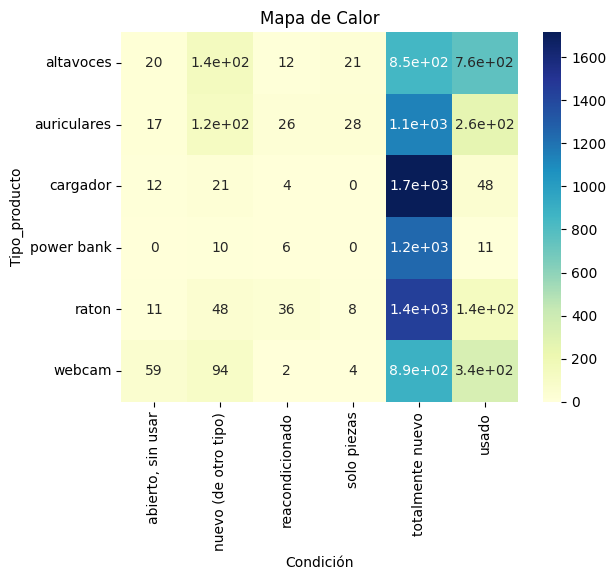

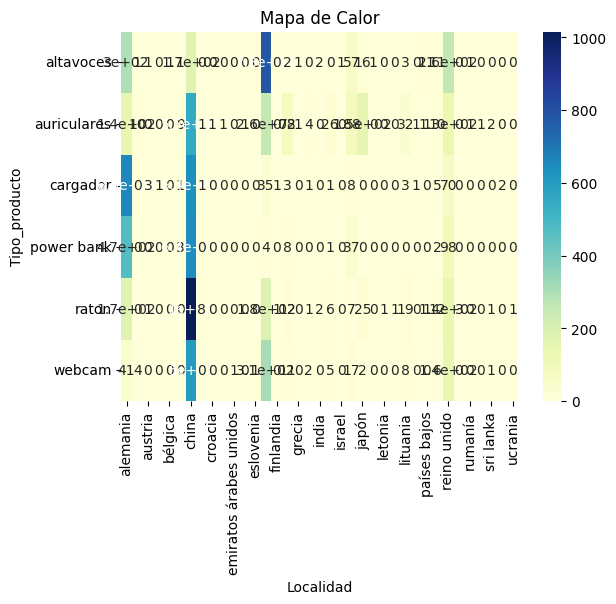

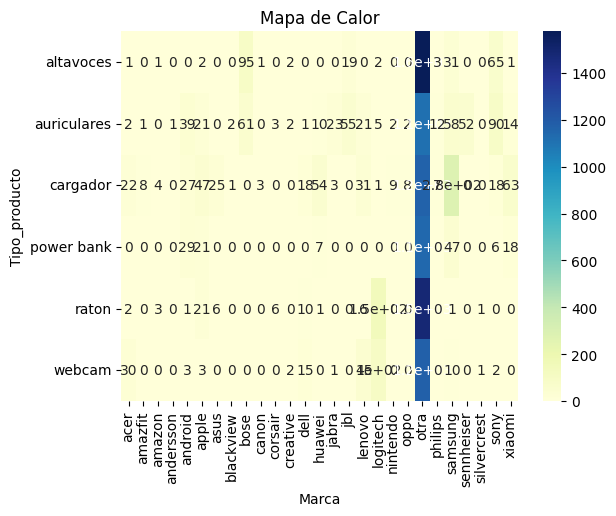

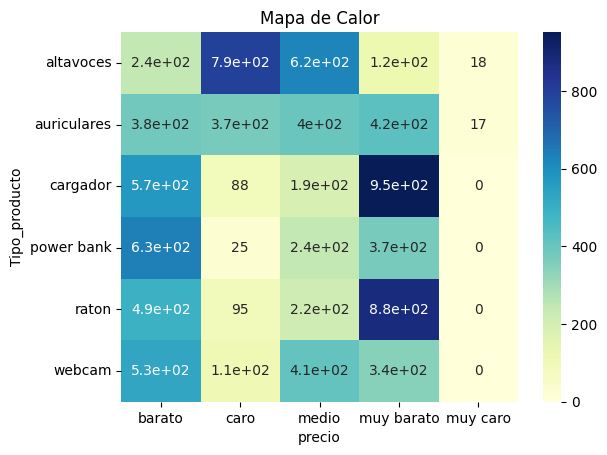

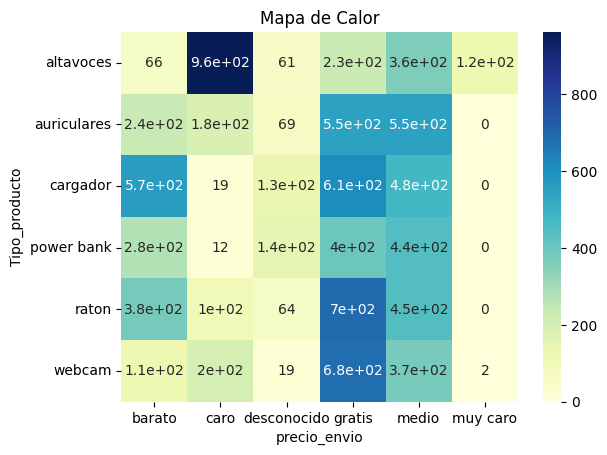

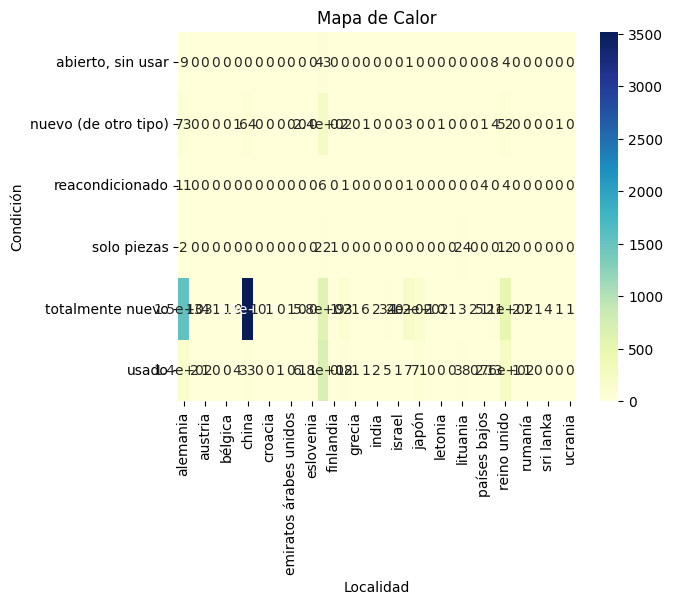

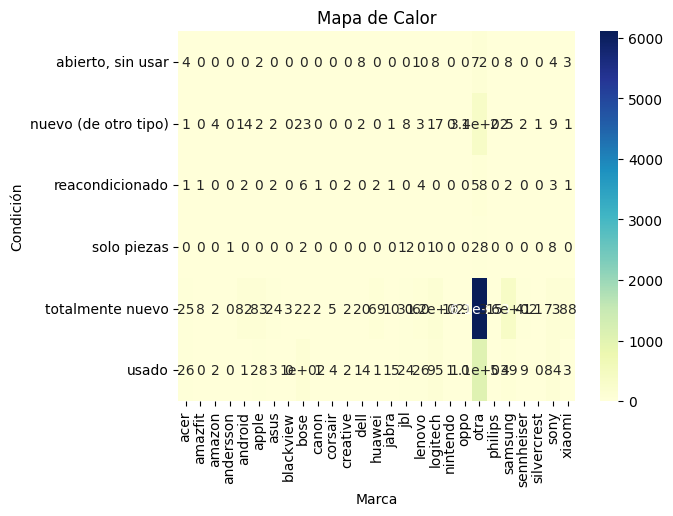

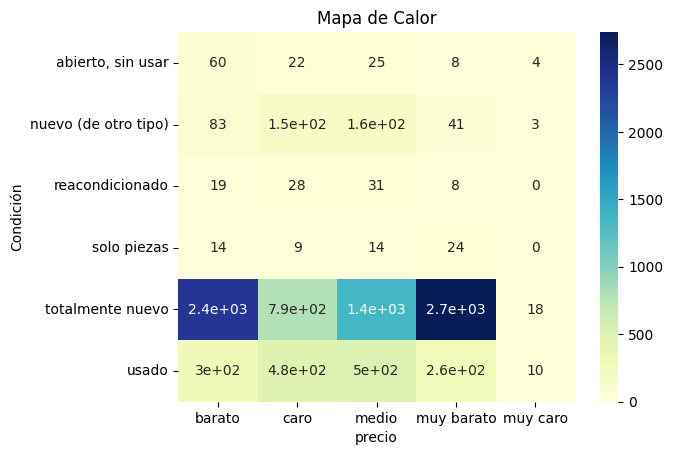

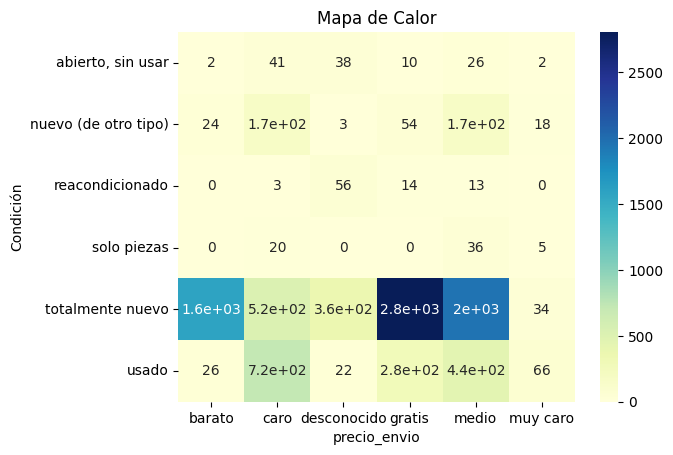

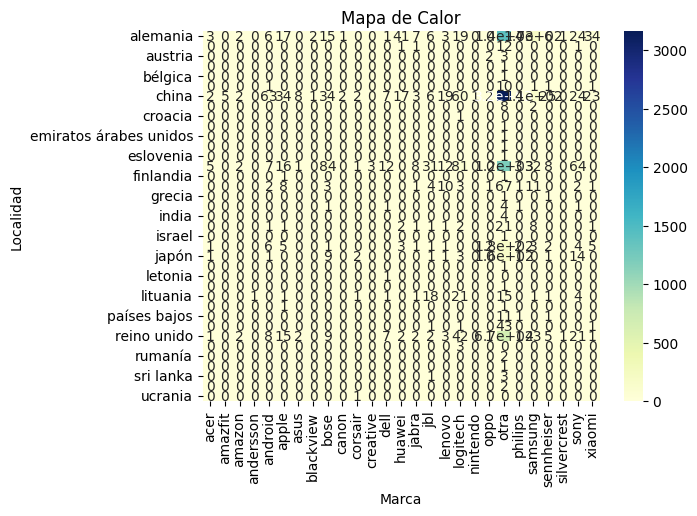

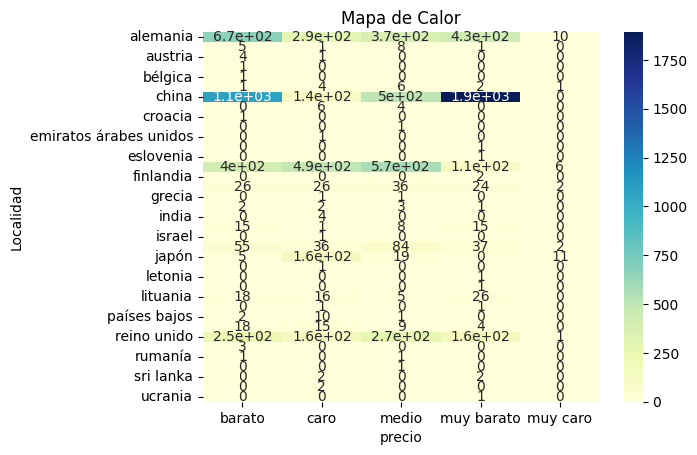

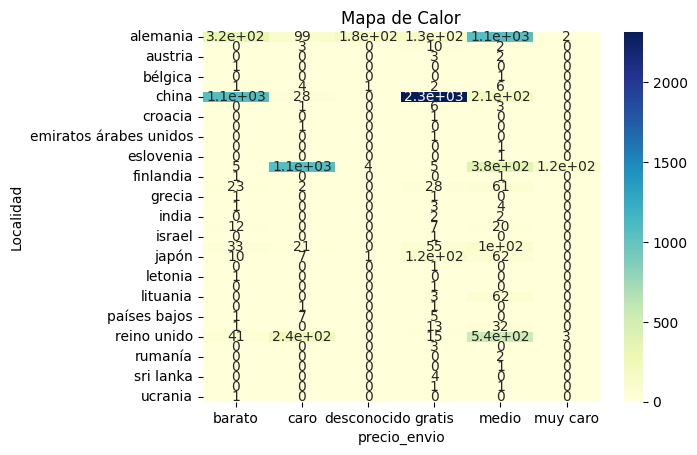

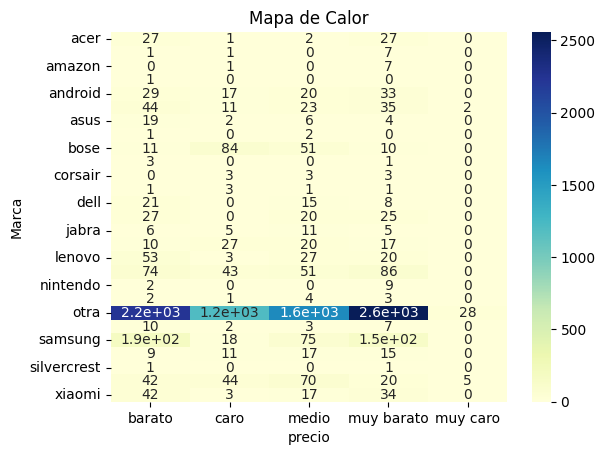

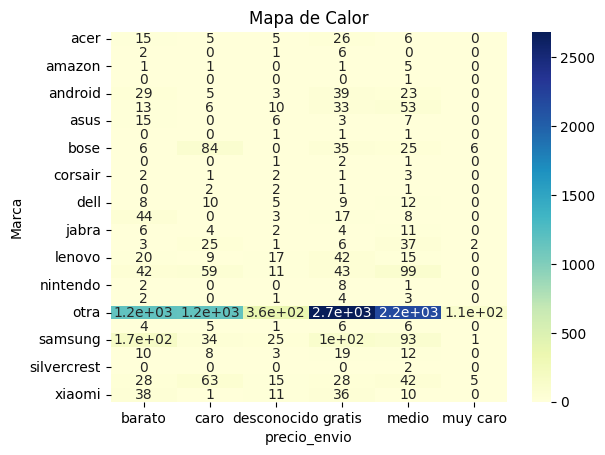

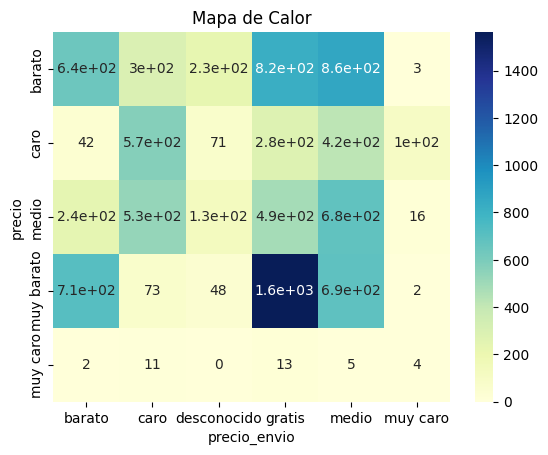

In [ ]:
import seaborn as sns

for i in range(len(atributos)):
    for j in range(i + 1, len(atributos)):
        var1 = atributos[i]
        var2 = atributos[j]

        contingency_table = pd.crosstab(dataset0[var1], dataset0[var2])
        sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
        plt.title('Mapa de Calor')
        plt.show()

In [ ]:
import matplotlib.pyplot as plt

for i in range(len(atributos)):
    for j in range(i + 1, len(atributos)):
        var1 = atributos[i]
        var2 = atributos[j]

        contingency_table = pd.crosstab(dataset0[var1], dataset0[var2])
        contingency_table.plot(kind='bar')
        plt.title('Relacion entre variables')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()

---
# Clustering
---

Para las pruebas sucesivas del modelo, se carga directamente el dataset ya final tras las transformaciones anteriores, para ahorrar tiempo en la ejecucion

In [7]:
dataset0 = upload_files()
print(dataset0.shape)
dataset0.head()

Saving dataset_transformado_final.csv to dataset_transformado_final.csv
User uploaded file "dataset_transformado_final.csv" with length 560492 bytes
(9533, 7)


Unnamed: 0 Tipo_producto         Condición    Localidad   Marca  \
0           1   auriculares  totalmente nuevo  Desconocido    otra   
1           2   auriculares  totalmente nuevo  Desconocido  lenovo   
2           3   auriculares  totalmente nuevo  Desconocido  xiaomi   
3           4   auriculares  totalmente nuevo        china     jbl   
4           6   auriculares  totalmente nuevo  Desconocido    otra   

       precio precio_envio  
0      barato  desconocido  
1      barato  desconocido  
2  muy barato       gratis  
3      barato       gratis  
4  muy barato       gratis

In [8]:
column_names = dataset0.columns.tolist()

print("Columnas del dataset:")
for column in column_names:
  print(column)

Columnas del dataset:
Unnamed: 0
Tipo_producto
Condición
Localidad
Marca
precio
precio_envio


In [9]:
dataset0.drop('Unnamed: 0', axis = 1, inplace = True)
dataset0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9533 entries, 0 to 9532
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tipo_producto  9533 non-null   object
 1   Condición      9533 non-null   object
 2   Localidad      9533 non-null   object
 3   Marca          9533 non-null   object
 4   precio         9533 non-null   object
 5   precio_envio   9533 non-null   object
dtypes: object(6)
memory usage: 447.0+ KB


## **K-Modes**

In [38]:
# instalar kmodes

!pip install kmodes

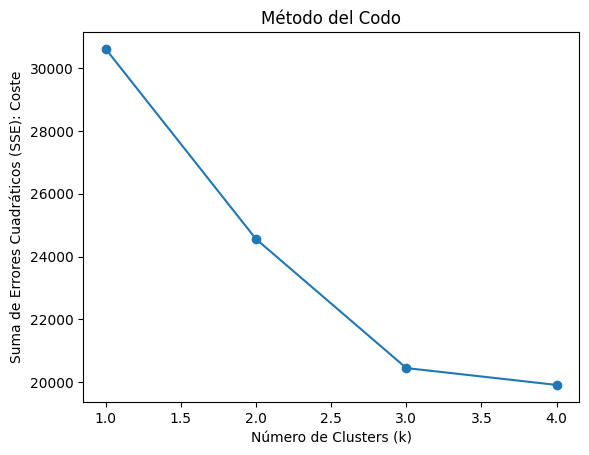

In [ ]:
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes

sse = []
k_values = range(1, 5)

for k in k_values:
    km = KModes(n_clusters=k, init='Huang', n_init=5)
    km.fit_predict(dataset0)
    sse.append(km.cost_)

plt.plot(k_values, sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de Errores Cuadráticos (SSE): Coste')
plt.title('Método del Codo')
plt.show()

**Construccion del modelo para distintas configuraciones**

KModes (k=3, init=Huang)

In [ ]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 3  # Número de clusters
init = 'Huang'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo

km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset0)

# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k3_huang = dataset0.copy()

# Se agregan las labels generadas a traves de kmodes
df_kmeans_k3_huang['cluster'] = labels
df_kmeans_k3_huang['cluster'].value_counts()




cluster
2    3868
0    3791
1    1874
Name: count, dtype: int64

KModes (k=3, init=Cao)

In [ ]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 3  # Número de clusters
init = 'Cao'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo


km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset0)

# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k3_cao = dataset0.copy()

# Se agregan las labels generadas a traves de kmodes
df_kmeans_k3_cao['cluster'] = labels
df_kmeans_k3_cao['cluster'].value_counts()

cluster
0    4956
1    2870
2    1707
Name: count, dtype: int64

KModes (k=2, init=Huang)

In [ ]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 2  # Número de clusters
init = 'Huang'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo


km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset0)

# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k2_huang = dataset0.copy()

# Se agregan las labels generadas a traves de kmodes
df_kmeans_k2_huang['cluster'] = labels
df_kmeans_k2_huang['cluster'].value_counts()

cluster
0    5402
1    4131
Name: count, dtype: int64

KModes (k=2, init=Cao)

In [ ]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 2  # Número de clusters
init = 'Cao'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo


km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset0)

# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k2_cao = dataset0.copy()

# Se agregan las labels generadas a traves de kmodes
df_kmeans_k2_cao['cluster'] = labels
df_kmeans_k2_cao['cluster'].value_counts()

cluster
0    6346
1    3187
Name: count, dtype: int64

### **Evaluacion y pruebas de modelos**

**MLflow en Visual Studio**

Esta parte de evaluacion del modelos para distintas configuraciones de los aprametros (k, init) del algoritmo kmodes se lleva a cabo en el IDE: Visual Studio

**Evaluacion y analisis manual**

In [ ]:
#Contar la cantidad de elementos en cada cluster:

cluster_counts = df_kmeans_k3_huang['cluster'].value_counts()
print(cluster_counts)


#Ver las características de cada cluster

# Agrupar por cluster y ver las características más comunes
grouped = df_kmeans_k3_huang.groupby('cluster').agg(lambda x: x.mode()[0])
print(grouped)

cluster
0    4629
1    3245
2    1659
Name: count, dtype: int64
        Tipo_producto         Condición       Localidad Marca      precio  \
cluster                                                                     
0         auriculares  totalmente nuevo           china  otra      barato   
1            cargador  totalmente nuevo           china  otra  muy barato   
2           altavoces             usado  estados unidos  otra        caro   

        precio_envio  
cluster               
0              medio  
1             gratis  
2               caro  


**Análisis visual del clustering**

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 5.0 MB/s eta 0:00:00


In [ ]:
df_kmeans_k2_huang.head()

Unnamed: 0 Tipo_producto         Condición    Localidad   Marca  \
0           1   auriculares  totalmente nuevo  Desconocido    otra   
1           2   auriculares  totalmente nuevo  Desconocido  lenovo   
2           3   auriculares  totalmente nuevo  Desconocido  xiaomi   
3           4   auriculares  totalmente nuevo        china     jbl   
4           6   auriculares  totalmente nuevo  Desconocido    otra   

       precio precio_envio  cluster  
0      barato  desconocido        1  
1      barato  desconocido        0  
2  muy barato       gratis        1  
3      barato       gratis        1  
4  muy barato       gratis        1

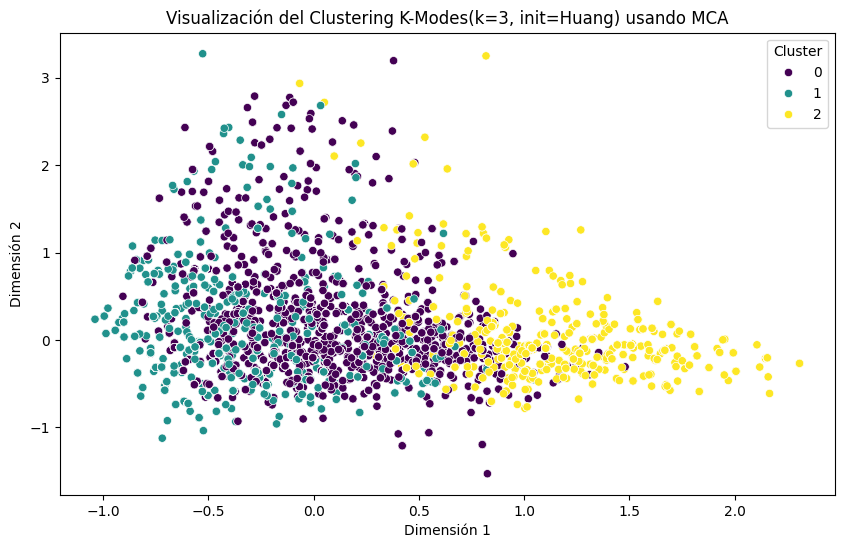

In [ ]:

from prince import MCA
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import pandas as pd # Importa pandas explicitly


# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_kmeans_k3_huang.drop('cluster', axis=1))

# Crear un DataFrame para los resultados de MCA
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=df_kmeans_k3_huang.index)
mca_df['cluster'] = df_kmeans_k3_huang['cluster']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering K-Modes(k=3, init=Huang) usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()


In [ ]:
#Codificación de Variables Categóricas para Davies-Bouldin-Score
# Extract features and labels
X = df_kmeans_k3_huang.drop('cluster', axis=1)
labels = df_kmeans_k3_huang['cluster']

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)


#Calcular el Davies-Bouldin-Score
davies_bouldin = davies_bouldin_score(X_encoded, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 2.819060381238483


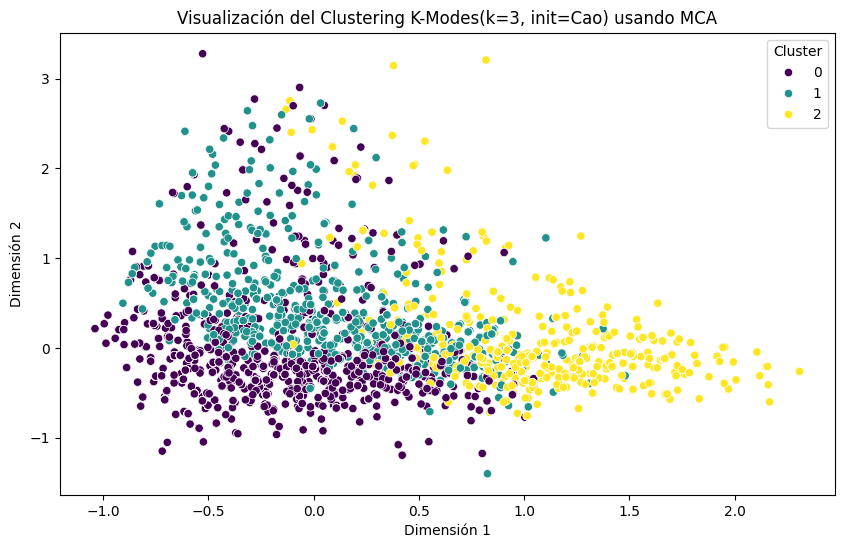

In [ ]:
from prince import MCA
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import pandas as pd # Importa pandas explicitly


# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_kmeans_k3_cao.drop('cluster', axis=1))

# Crear un DataFrame para los resultados de MCA
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=df_kmeans_k3_cao.index)
mca_df['cluster'] = df_kmeans_k3_cao['cluster']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering K-Modes(k=3, init=Cao) usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

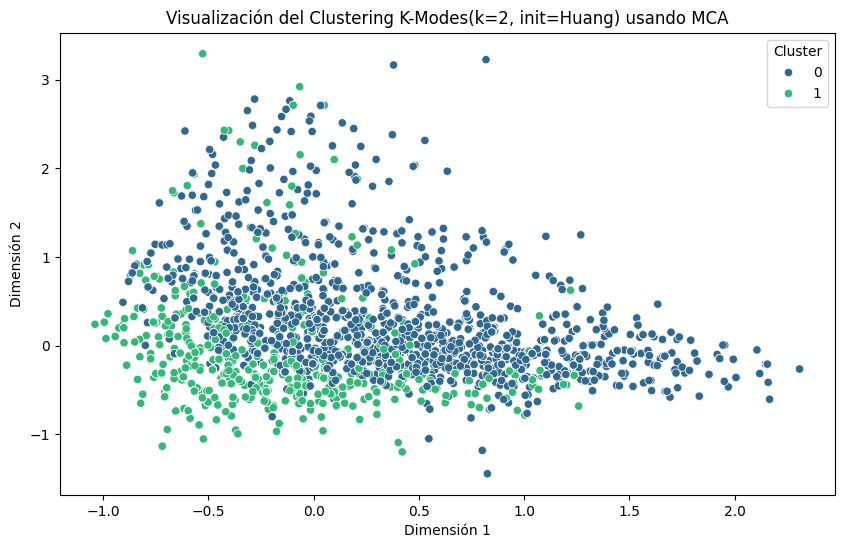

In [ ]:
from prince import MCA
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import pandas as pd # Importa pandas explicitly


# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_kmeans_k2_huang.drop('cluster', axis=1))

# Crear un DataFrame para los resultados de MCA
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=df_kmeans_k2_huang.index)
mca_df['cluster'] = df_kmeans_k2_huang['cluster']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering K-Modes(k=2, init=Huang) usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
#Codificación de Variables Categóricas para Davies-Bouldin-Score
# Extract features and labels
X = df_kmeans_k2_huang.drop('cluster', axis=1)
labels = df_kmeans_k2_huang['cluster']

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)


#Calcular el Davies-Bouldin-Score
davies_bouldin = davies_bouldin_score(X_encoded, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 3.1172551581525396


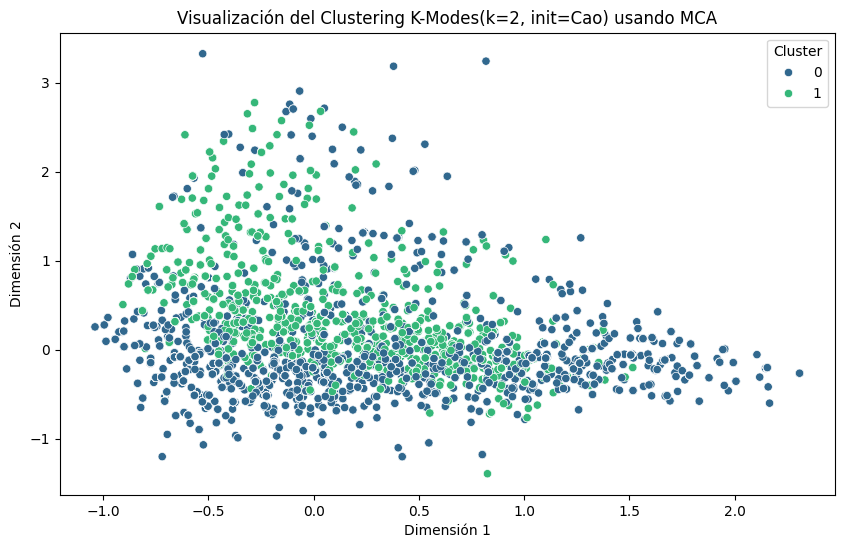

In [ ]:
from prince import MCA
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import pandas as pd # Importa pandas explicitly


# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_kmeans_k2_cao.drop('cluster', axis=1))

# Crear un DataFrame para los resultados de MCA
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=df_kmeans_k2_cao.index)
mca_df['cluster'] = df_kmeans_k2_cao['cluster']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering K-Modes(k=2, init=Cao) usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

**Visualizacion sin MCA**

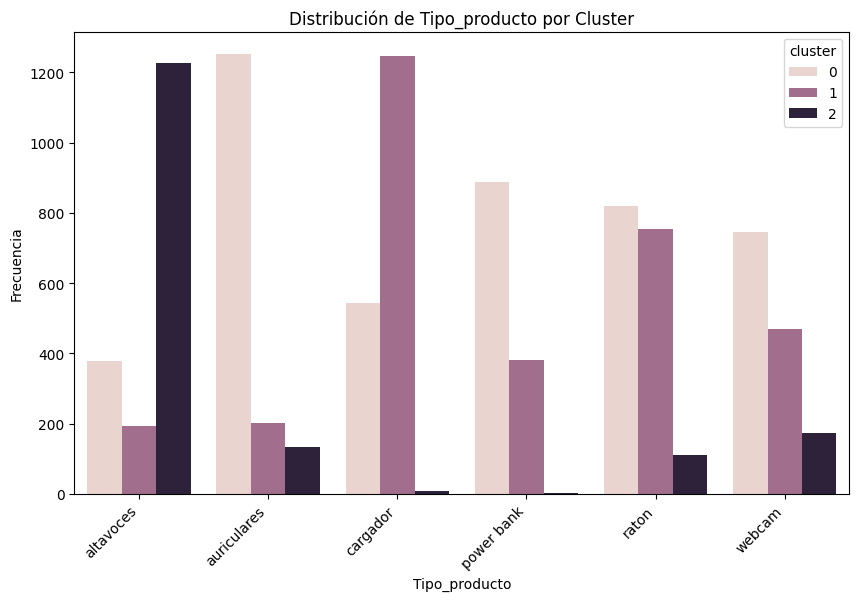

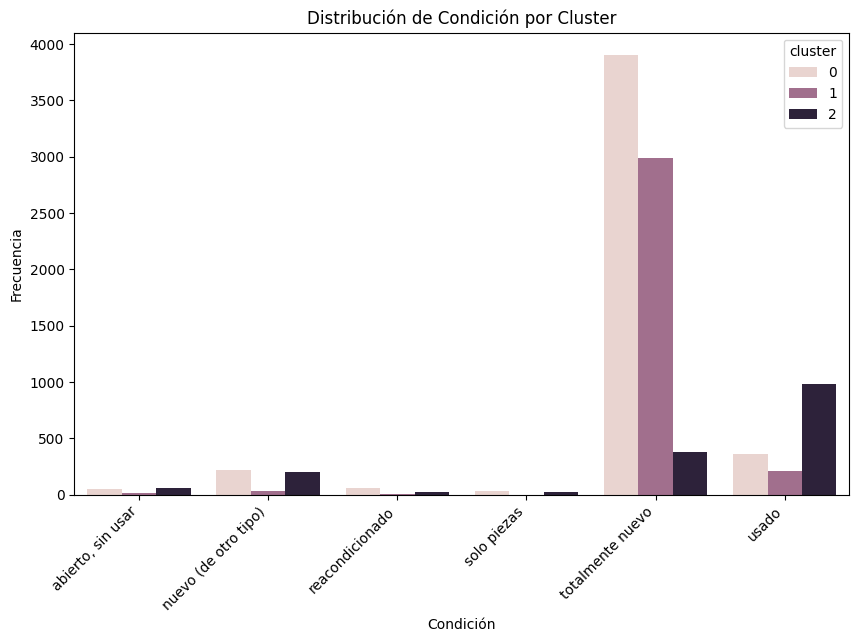

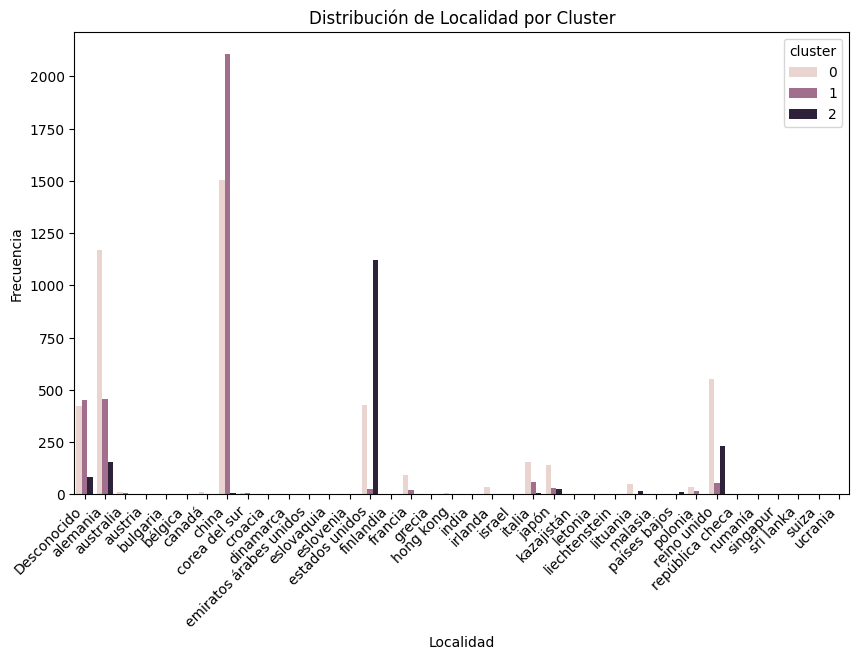

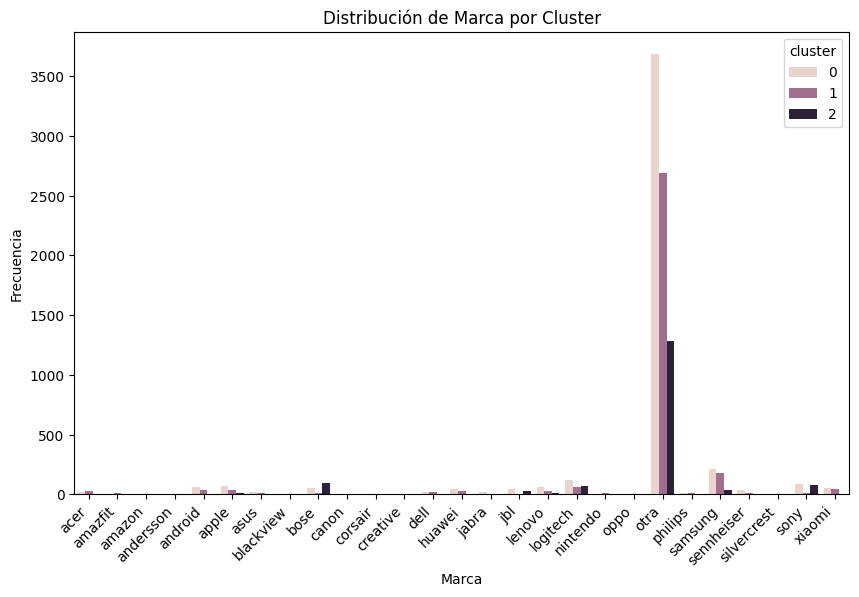

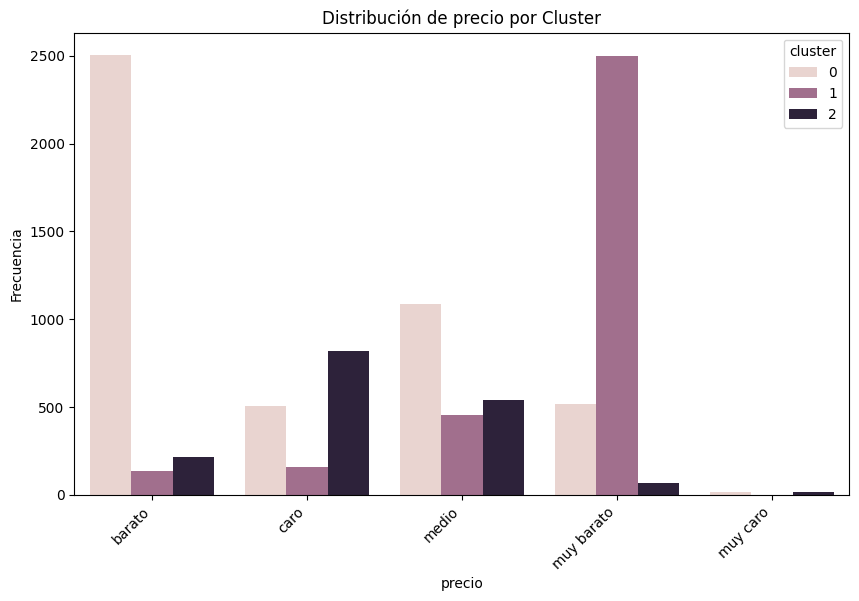

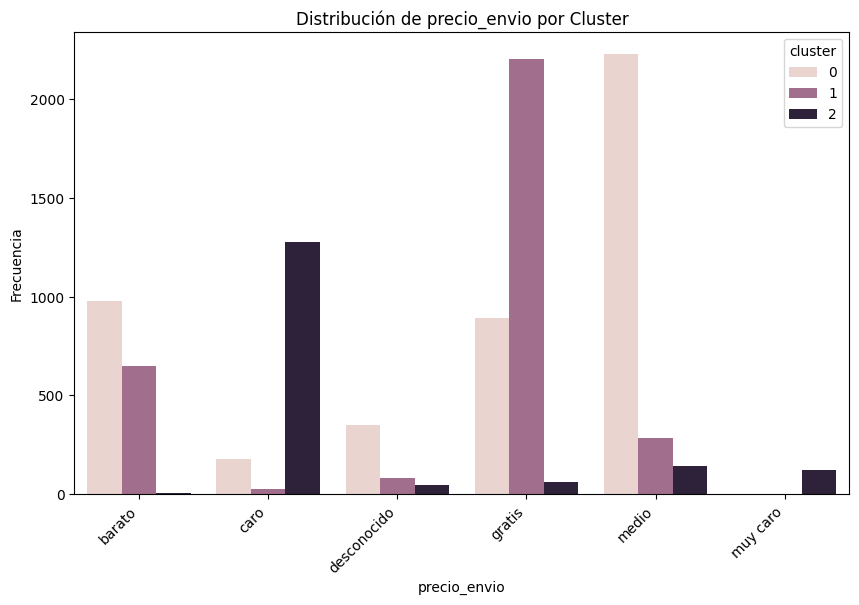

In [ ]:
# Representacion grafica por cada atributo segun el cluster al que pertenecen

# df_kmeans_k3_huang
for column in df_kmeans_k3_huang.columns:
  if column != 'cluster':
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='cluster', data=df_kmeans_k3_huang)
    plt.title(f'Distribución de {column} por Cluster')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()

**No se incluye el atributo marca.**

In [10]:
dataset0.drop('Marca', axis=1, inplace=True)

k=2 init='Huang'

In [ ]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 2  # Número de clusters
init = 'Huang'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo


km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset0)

# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k2_huang = dataset0.copy()

# Se agregan las labels generadas a traves de kmodes
df_kmeans_k2_huang['cluster'] = labels
df_kmeans_k2_huang['cluster'].value_counts()

cluster
0    5912
1    3621
Name: count, dtype: int64

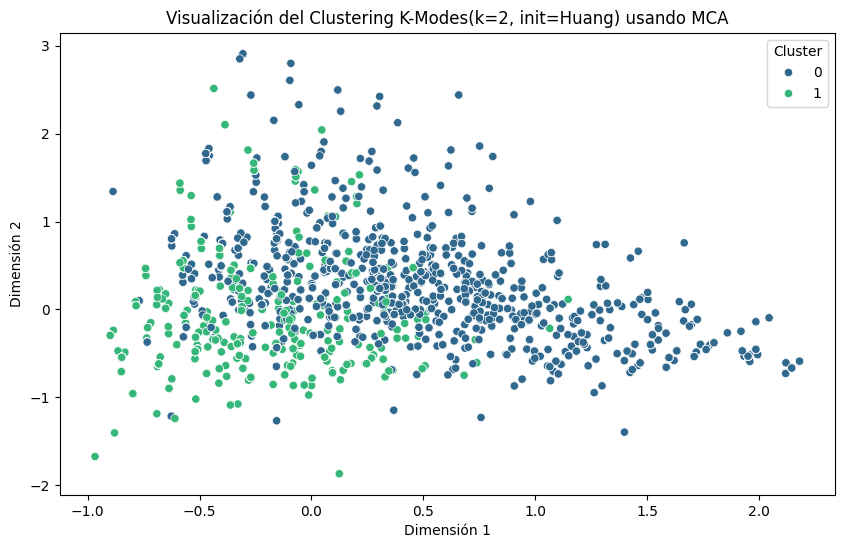

In [ ]:
from prince import MCA
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import pandas as pd # Importa pandas explicitly


# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df_kmeans_k2_huang.drop('cluster', axis=1))

# Crear un DataFrame para los resultados de MCA
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=df_kmeans_k2_huang.index)
mca_df['cluster'] = df_kmeans_k2_huang['cluster']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering K-Modes(k=2, init=Huang) usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

Metrica: davies bouldin score

In [ ]:
!pip install scikit-learn

con el metodo de encoder: dummies

In [ ]:
from sklearn.metrics import davies_bouldin_score


# Extract features and labels
X = df_kmeans_k2_huang.drop('cluster', axis=1)
labels = df_kmeans_k2_huang['cluster']


# Convert categorical features to numerical representations for Davies-Bouldin score
X_encoded = pd.get_dummies(X)


# Calculate Davies-Bouldin score
davies_bouldin = davies_bouldin_score(X_encoded, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 19.066944074919885


Con el metodo de encoder: OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
#Codificación de Variables Categóricas

X = df_kmeans_k2_huang.drop('cluster', axis=1)
labels = df_kmeans_k2_huang['cluster']
encoder = OneHotEncoder(sparse_output=False)
X_encoded2 = encoder.fit_transform(X)


#Calcular el Davies-Bouldin-Score
davies_bouldin2 = davies_bouldin_score(X_encoded2, labels)
print(f"Davies-Bouldin Index: {davies_bouldin2}")

Davies-Bouldin Index: 2.8994056512520925


k=3 init='Huang'

In [ ]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 3  # Número de clusters
init = 'Huang'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo


km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset0)

# Se preserva el conjunto de datos original para evitar problemas
df_kmeans_k3_huang = dataset0.copy()

# Se agregan las labels generadas a traves de kmodes
df_kmeans_k3_huang['cluster'] = labels
df_kmeans_k3_huang['cluster'].value_counts()

cluster
1    4973
2    2331
0    2229
Name: count, dtype: int64

metrica de evaluacion

In [ ]:
#Codificación de Variables Categóricas

X = df_kmeans_k3_huang.drop('cluster', axis=1)
labels = df_kmeans_k3_huang['cluster']

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)


#Calcular el Davies-Bouldin-Score
davies_bouldin = davies_bouldin_score(X_encoded, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 2.737158845370739


## **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

En base a los resultados obtenidos en el clustering anterior, se decide eliminar el atributo marca.

In [63]:
dataset0.drop('Marca', axis=1, inplace=True)

In [20]:
pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 5.6 MB/s eta 0:00:00


Se prueban con distitnas medidas de distancias: hamming, jaccard

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2361: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


dbscan_cluster
0    9533
Name: count, dtype: int64


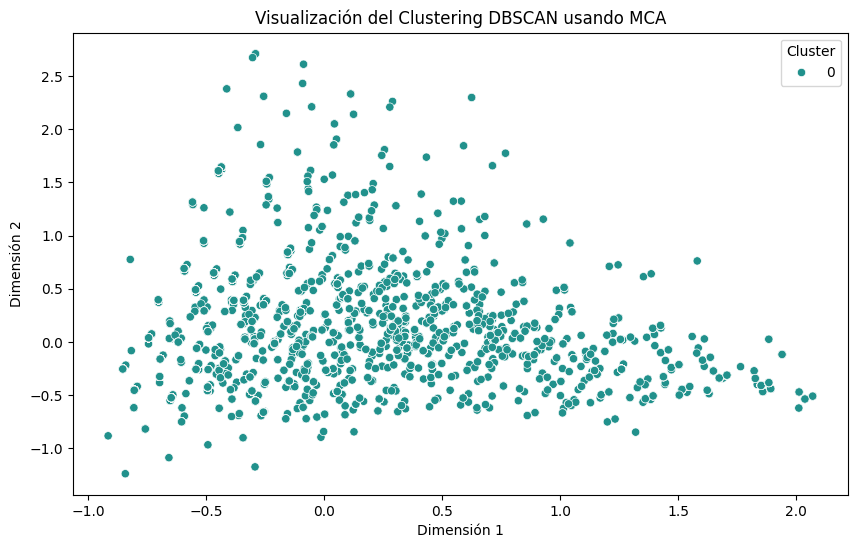

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from prince import MCA
import matplotlib.pyplot as plt
import prince

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(dataset0)

# escalado de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# DBSCAN
dbscan = DBSCAN(metric='jaccard',eps=0.1, min_samples=20)
labels = dbscan.fit_predict(X_scaled)


dataset0['dbscan_cluster'] = labels

# Resultados
print(dataset0['dbscan_cluster'].value_counts())

# Visualizacion(MCA)

mca = prince.MCA(n_components=2)
mca_results = mca.fit_transform(dataset0.drop('dbscan_cluster', axis=1))

# crear df para los resultados
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=dataset0.index)
mca_df['cluster'] = dataset0['dbscan_cluster']

# Visualziacion
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering DBSCAN usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()



In [65]:
dataset0.head()

Tipo_producto         Condición    Localidad      precio precio_envio  \
0   auriculares  totalmente nuevo  Desconocido      barato  desconocido   
1   auriculares  totalmente nuevo  Desconocido      barato  desconocido   
2   auriculares  totalmente nuevo  Desconocido  muy barato       gratis   
3   auriculares  totalmente nuevo        china      barato       gratis   
4   auriculares  totalmente nuevo  Desconocido  muy barato       gratis   

   dbscan_cluster  
0               0  
1               0  
2               0  
3               0  
4               0

In [66]:
# eliminar dbscan_cluster

dataset0.drop('dbscan_cluster', axis=1, inplace=True)
dataset0.head()

Cuando se obtiene solo 1 cluster no se puede usar DBS

In [50]:
# Caracteristicas asociadas a cada cluster
grouped = dataset0.groupby('dbscan_cluster').agg(lambda x: x.mode()[0])
print("\nCharacteristics of each cluster:\n", grouped)


Characteristics of each cluster:
                Tipo_producto         Condición Localidad      precio  \
dbscan_cluster                                                         
0                  altavoces  totalmente nuevo     china  muy barato   

               precio_envio  
dbscan_cluster               
0                    gratis  


Seria la moda de cada atributo categorico

In [47]:
from google.colab import files
grouped.to_csv('dataset_clustering_DBSCAN.csv', encoding='utf-8')
files.download('dataset_clustering_DBSCAN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimizacion de hiperparametros

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import davies_bouldin_score, make_scorer


# Transformar variables categóricas a numéricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(dataset0) # Sin atributo marca

# Definir los parámetros para la búsqueda
param_grid = {
    'eps': np.arange(0.1, 1.0, 0.2),
    'min_samples': range(12, 15)
}

# Crear un scorer para el Davies-Bouldin Score
dbs_scorer = make_scorer(davies_bouldin_score)

# DBSCAN como modelo
dbscan = DBSCAN(metric='hamming')

# Grid Search
grid_search = GridSearchCV(dbscan, param_grid, scoring=dbs_scorer, cv=5)
grid_search.fit(data_encoded)

print("Mejores parámetros (Grid Search):", grid_search.best_params_)
print("Mejor puntuación (Grid Search):", -grid_search.best_score_)  # Invertir la puntuación

# Random Search
random_search = RandomizedSearchCV(dbscan, param_grid, n_iter=20, scoring=dbs_scorer, cv=5, random_state=42)
random_search.fit(data_encoded)

print("Mejores parámetros (Random Search):", random_search.best_params_)
print("Mejor puntuación (Random Search):", -random_search.best_score_)  # Invertir la puntuación


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

Mejores parámetros (Grid Search): {'eps': 0.1, 'min_samples': 12}
Mejor puntuación (Grid Search): nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/

Mejores parámetros (Random Search): {'min_samples': 12, 'eps': 0.1}
Mejor puntuación (Random Search): nan


Si se obtiene como mejor puntuacion: nan , siginifica que el numero de clusters es 1

ALTERNATIVA: REDUCIR LA CARDINALIDAD DE ATRIBUTOS

In [77]:
print(dataset0['Localidad'].unique())

['Desconocido' 'china' 'lituania' 'alemania' 'japón' 'estados unidos'
 'reino unido' 'irlanda' 'francia' 'italia' 'canadá' 'hong kong'
 'australia' 'grecia' 'eslovaquia' 'polonia' 'sri lanka' 'rumanía'
 'países bajos' 'singapur' 'eslovenia' 'croacia' 'malasia'
 'emiratos árabes unidos' 'dinamarca' 'corea del sur' 'república checa'
 'letonia' 'liechtenstein' 'austria' 'india' 'ucrania' 'kazajistán'
 'bélgica' 'suiza' 'israel' 'finlandia' 'bulgaria']


In [12]:
# hacer una copia del dataset0

import shutil
dataset1 = dataset0.copy()


In [79]:
dataset1.head()

Tipo_producto         Condición    Localidad      precio precio_envio
0   auriculares  totalmente nuevo  Desconocido      barato  desconocido
1   auriculares  totalmente nuevo  Desconocido      barato  desconocido
2   auriculares  totalmente nuevo  Desconocido  muy barato       gratis
3   auriculares  totalmente nuevo        china      barato       gratis
4   auriculares  totalmente nuevo  Desconocido  muy barato       gratis

In [13]:
# MaPEAR
city_to_region = {

'china' : 'asia',
'lituania' : 'europa',
'alemania' : 'europa',
'japón' : 'asia',
'estados unidos' : 'norteamerica',
'reino unido' : 'europa',
'irlanda' : 'europa',
'francia' : 'europa',
'italia' : 'europa',
'canadá' : 'norteamerica',
'hong kong' : 'asia',
'australia' : 'oceania',
'grecia' : 'europa',
'eslovaquia' : 'europa',
'polonia' : 'europa',
'sri lanka': 'asia',
'españa' : 'europa',
'rumanía' : 'europa',
'países bajos' : 'europa',
'singapur' : 'asia',
'eslovenia' : 'europa',
'croacia' : 'europa',
'malasia' : 'asia',
'emiratos árabes unidos' : 'asia',
'dinamarca' : 'europa',
'corea del sur' : 'asia',
'república checa' : 'europa',
'letonia' : 'europa',
'liechtenstein' : 'europa',
'austria' : 'europa',
'india' : 'asia',
'ucrania' : 'europa',
'kazajistán' : 'asia',
'bélgica': 'europa',
'suiza' : 'europa',
'israel' : 'asia',
'finlandia' : 'europa',
'bulgaria': 'europa',
'Desconocido' : 'desconocido',
'eslovenia' : 'europa'

}

# Crear una nueva columna para la región: Continente
dataset1['Region'] = dataset1['Localidad'].map(city_to_region)
dataset1 = dataset1.drop(columns=['Localidad'])


In [14]:
dataset1.head()

Tipo_producto         Condición      precio precio_envio       Region
0   auriculares  totalmente nuevo      barato  desconocido  desconocido
1   auriculares  totalmente nuevo      barato  desconocido  desconocido
2   auriculares  totalmente nuevo  muy barato       gratis  desconocido
3   auriculares  totalmente nuevo      barato       gratis         asia
4   auriculares  totalmente nuevo  muy barato       gratis  desconocido

Se repiten los analis anteriores

Prueba previa sin optimizacion de hiperaparametros

dbscan_cluster
 0    9529
-1       4
Name: count, dtype: int64


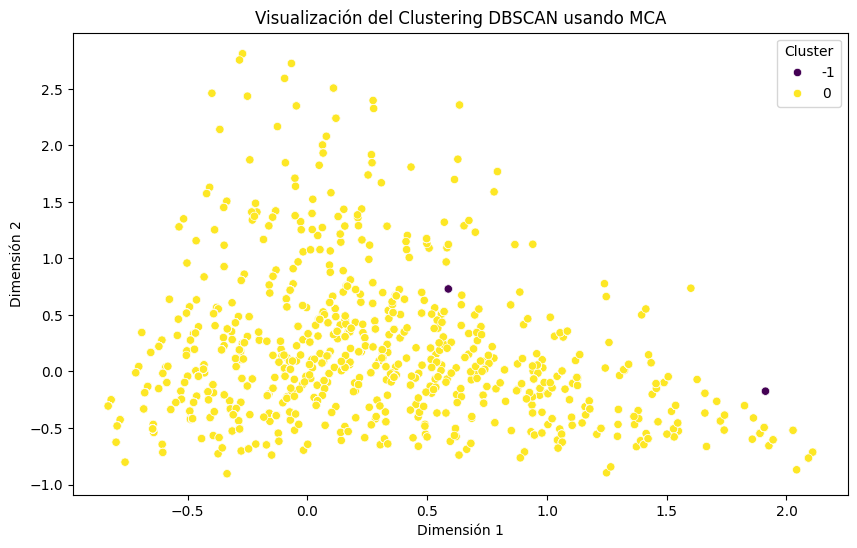

In [94]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from prince import MCA


encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(dataset1)

# Scale the data (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Apply DBSCAN
dbscan = DBSCAN(metric='hamming',eps=0.1, min_samples=20) # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X_scaled)

# Add the cluster labels to your DataFrame
dataset1['dbscan_cluster'] = labels

# Analyze the results (e.g., number of clusters, noise points)
print(dataset1['dbscan_cluster'].value_counts())

# Visualize the clusters (if possible with reduced dimensions using techniques like PCA or MCA)

#Example using MCA for visualization (as in the original code)
mca = prince.MCA(n_components=2)
mca_results = mca.fit_transform(dataset1.drop('dbscan_cluster', axis=1))

# Create a DataFrame for the MCA results
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=dataset1.index)
mca_df['cluster'] = dataset1['dbscan_cluster']

# Visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering DBSCAN usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

In [95]:
dataset1.head()

Tipo_producto         Condición      precio precio_envio       Region  \
0   auriculares  totalmente nuevo      barato  desconocido  desconocido   
1   auriculares  totalmente nuevo      barato  desconocido  desconocido   
2   auriculares  totalmente nuevo  muy barato       gratis  desconocido   
3   auriculares  totalmente nuevo      barato       gratis         asia   
4   auriculares  totalmente nuevo  muy barato       gratis  desconocido   

   dbscan_cluster  
0               0  
1               0  
2               0  
3               0  
4               0

In [96]:
# eliminar dbscan_cluster

dataset1.drop('dbscan_cluster', axis=1, inplace=True)

In [89]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import davies_bouldin_score, make_scorer


# Transformar variables categóricas a numéricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(dataset1) # Sin atributo marca

# Definir los parámetros para la búsqueda
param_grid = {
    'eps': np.arange(0.1, 1.0, 0.2),
    'min_samples': range(12, 15)
}

# Crear un scorer para el Davies-Bouldin Score
dbs_scorer = make_scorer(davies_bouldin_score)

# DBSCAN como modelo
dbscan = DBSCAN(metric='hamming')

# Grid Search
grid_search = GridSearchCV(dbscan, param_grid, scoring=dbs_scorer, cv=5)
grid_search.fit(data_encoded)

print("Mejores parámetros (Grid Search):", grid_search.best_params_)
print("Mejor puntuación (Grid Search):", -grid_search.best_score_)  # Invertir la puntuación

# Random Search
random_search = RandomizedSearchCV(dbscan, param_grid, n_iter=20, scoring=dbs_scorer, cv=5, random_state=42)
random_search.fit(data_encoded)

print("Mejores parámetros (Random Search):", random_search.best_params_)
print("Mejor puntuación (Random Search):", -random_search.best_score_)  # Invertir la puntuación

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

Mejores parámetros (Grid Search): {'eps': 0.1, 'min_samples': 12}
Mejor puntuación (Grid Search): nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 969, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/

Mejores parámetros (Random Search): {'min_samples': 12, 'eps': 0.1}
Mejor puntuación (Random Search): nan


## **Hierarchical Clustering**

In [112]:
dataset1.head()

Tipo_producto         Condición      precio precio_envio       Region
0   auriculares  totalmente nuevo      barato  desconocido  desconocido
1   auriculares  totalmente nuevo      barato  desconocido  desconocido
2   auriculares  totalmente nuevo  muy barato       gratis  desconocido
3   auriculares  totalmente nuevo      barato       gratis         asia
4   auriculares  totalmente nuevo  muy barato       gratis  desconocido

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import davies_bouldin_score, make_scorer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from prince import MCA

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

Contruccion del modelo: se han ido haciendo distintas pruebas con el mismo codigo

In [34]:
# Construccion del modelo

encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(dataset1)

Z = linkage(data_encoded, method='average')
hierarchical_labels = fcluster(Z, t=3, criterion='maxclust')

# Añadimos el clustering al dataset original
dataset1['dbscan_cluster'] = hierarchical_labels
# Resultado del clusterin
print(dataset1['dbscan_cluster'].value_counts())

dbscan_cluster
3    7945
2    1586
1       2
Name: count, dtype: int64


Metricas de evaluacion del modelo

In [35]:
# Davies-Bouldin y Silhouette Scores
hierarchical_db_score = davies_bouldin_score(data_encoded, hierarchical_labels)
hierarchical_silhouette_score = silhouette_score(data_encoded, hierarchical_labels)
print("Hierarchical Clustering Davies-Bouldin Score:", hierarchical_db_score)
print("Hierarchical Clustering Silhouette Score:", hierarchical_silhouette_score)

Hierarchical Clustering Davies-Bouldin Score: 1.48659649765728
Hierarchical Clustering Silhouette Score: 0.15910881340222377


Representacion grafica

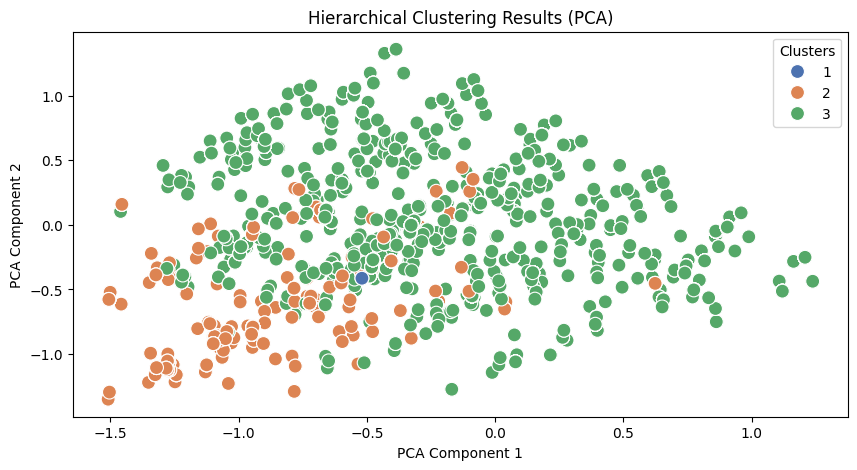

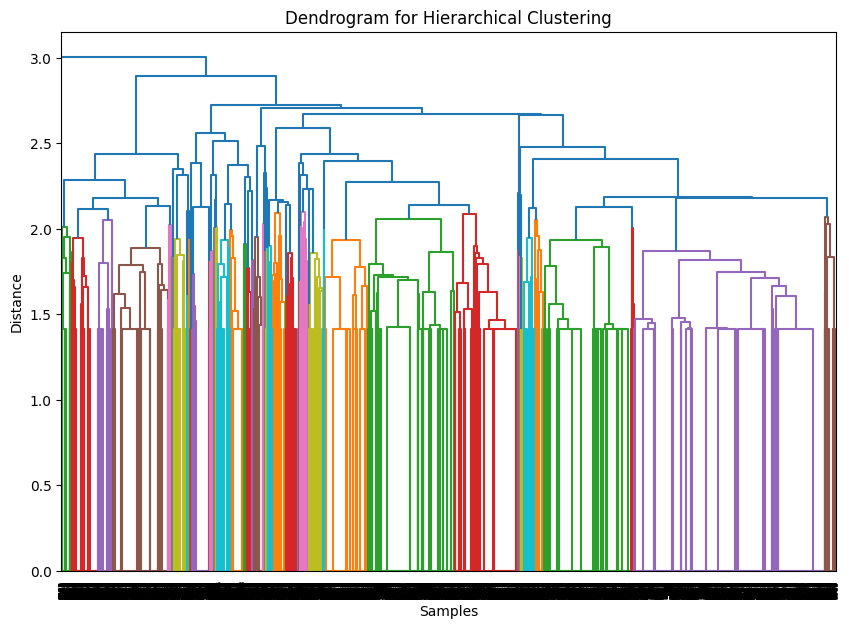

In [36]:
# Representacion grafica del clustering

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded)

# Visualización de Hierarchical Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=hierarchical_labels, palette='deep', s=100)
plt.title("Hierarchical Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Clusters')
plt.show()

# -------------------------
# Dendrograma
# -------------------------
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [32]:
dataset1.head()

Tipo_producto         Condición      precio precio_envio       Region  \
0   auriculares  totalmente nuevo      barato  desconocido  desconocido   
1   auriculares  totalmente nuevo      barato  desconocido  desconocido   
2   auriculares  totalmente nuevo  muy barato       gratis  desconocido   
3   auriculares  totalmente nuevo      barato       gratis         asia   
4   auriculares  totalmente nuevo  muy barato       gratis  desconocido   

   dbscan_cluster  
0               3  
1               3  
2               3  
3               3  
4               3

In [37]:
dataset1.drop('dbscan_cluster' , axis=1, inplace=True)

## **Agglomerative Clustering**

Agglomerative Clustering Silhouette Score: 0.054659725558167525
Davies-Bouldin Index: 0.8443485373369995


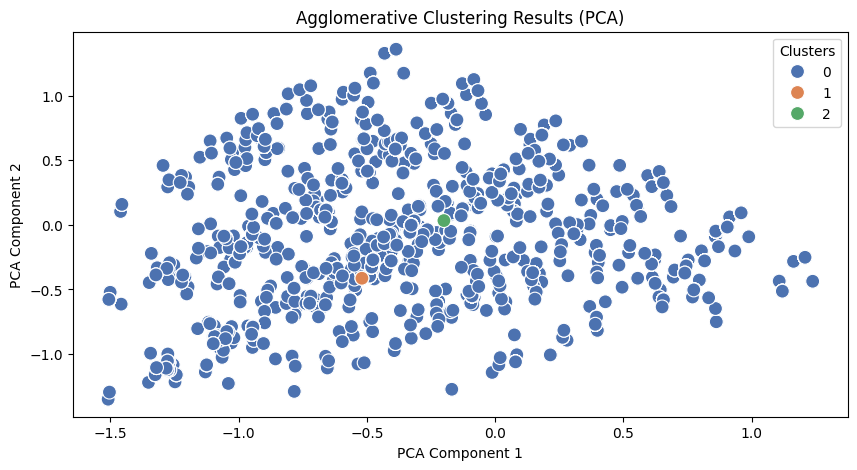

In [111]:
from sklearn.decomposition import PCA


# Transformar variables categóricas a numéricas usando One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(dataset1)


# -------------------------
# Agglomerative Clustering
# -------------------------

# Definir el modelo
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='single')

# Ajustar el modelo y predecir los clusters
agg_labels = agglomerative.fit_predict(data_encoded)

# Calcular el Silhouette Score
agg_silhouette_score = silhouette_score(data_encoded, agg_labels)

print("Agglomerative Clustering Silhouette Score:", agg_silhouette_score)

davies_bouldin = davies_bouldin_score(data_encoded, agg_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_encoded)


# Visualización de Agglomerative Clustering
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=agg_labels, palette='deep', s=100)
plt.title("Agglomerative Clustering Results (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Clusters')
plt.show()

In [106]:
dataset1.head()

Tipo_producto         Condición      precio precio_envio       Region
0   auriculares  totalmente nuevo      barato  desconocido  desconocido
1   auriculares  totalmente nuevo      barato  desconocido  desconocido
2   auriculares  totalmente nuevo  muy barato       gratis  desconocido
3   auriculares  totalmente nuevo      barato       gratis         asia
4   auriculares  totalmente nuevo  muy barato       gratis  desconocido

In [ ]:
# eliminar dbscan_cluster

dataset1.drop('dbscan_cluster', axis=1, inplace=True)

In [ ]:
# Transformar variables categóricas a numéricas usando One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(dataset1)

# -------------------------
# Agglomerative Clustering
# -------------------------

# Definir el modelo
agglomerative = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Ajustar el modelo y predecir los clusters
agg_labels = agglomerative.fit_predict(data_encoded)

# Calcular el Silhouette Score
agg_silhouette_score = silhouette_score(data_encoded, agg_labels)

print("Agglomerative Clustering Silhouette Score:", agg_silhouette_score)

davies_bouldin = davies_bouldin_score(data_encoded, agg_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Optimizacion de hiperparametros

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, make_scorer
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Transformar variables categóricas a numéricas
encoder = OneHotEncoder(sparse_output=False)
data_encoded = encoder.fit_transform(dataset1)

# Parámetros para búsqueda
param_grid_agglomerative = {
    'n_clusters': range(2, 4),
    'linkage': ['ward', 'complete', 'average']
}

# Crear un scorer para el Davies-Bouldin Score
dbs_scorer = make_scorer(davies_bouldin_score, greater_is_better=False)

# Agglomerative Clustering
agglomerative = AgglomerativeClustering()

# Grid Search para Agglomerative Clustering
grid_search_agglomerative = GridSearchCV(agglomerative, param_grid_agglomerative, scoring=dbs_scorer, cv=5)
grid_search_agglomerative.fit(data_encoded)

print("Mejores parámetros (Agglomerative Grid Search):", grid_search_agglomerative.best_params_)
print("Mejor puntuación (Agglomerative Grid Search):", -grid_search_agglomerative.best_score_)  # Invertir la puntuación

# Random Search para Agglomerative Clustering
random_search_agglomerative = RandomizedSearchCV(agglomerative, param_grid_agglomerative, n_iter=20, scoring=dbs_scorer, cv=5, random_state=42)
random_search_agglomerative.fit(data_encoded)

print("Mejores parámetros (Agglomerative Random Search):", random_search_agglomerative.best_params_)
print("Mejor puntuación (Agglomerative Random Search):", -random_search_agglomerative.best_score_)  # Invertir la puntuación


## **K-Modes 2.0**

In [39]:
dataset1.head()

Tipo_producto         Condición      precio precio_envio       Region
0   auriculares  totalmente nuevo      barato  desconocido  desconocido
1   auriculares  totalmente nuevo      barato  desconocido  desconocido
2   auriculares  totalmente nuevo  muy barato       gratis  desconocido
3   auriculares  totalmente nuevo      barato       gratis         asia
4   auriculares  totalmente nuevo  muy barato       gratis  desconocido

In [40]:
from os import initgroups
import seaborn as sns
from kmodes.kmodes import KModes

# Contruccion del modelo con los parametros seleccionados
k = 3  # Número de clusters
init = 'Huang'  # Método de inicialización
n_init = 5  # Número de veces que se ejecutará el algoritmo

km = KModes(n_clusters=k, init=init, n_init=n_init)
labels = km.fit_predict(dataset1)

# Se preserva el conjunto de datos original para evitar problemas
df2_kmeans_k3_huang = dataset1.copy()

# Se agregan las labels generadas a traves de kmodes
df2_kmeans_k3_huang['cluster'] = labels
df2_kmeans_k3_huang['cluster'].value_counts()

cluster
0    4796
1    3106
2    1631
Name: count, dtype: int64

VISUALIZACION

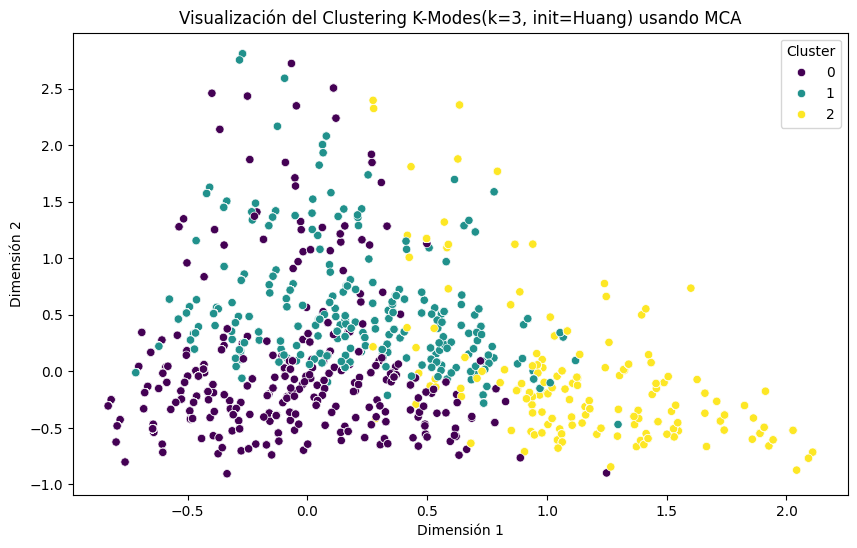

In [41]:
from prince import MCA
import matplotlib.pyplot as plt
import prince
import seaborn as sns
import pandas as pd # Importa pandas explicitly


# Aplicar MCA
mca = MCA(n_components=2)
mca_results = mca.fit_transform(df2_kmeans_k3_huang.drop('cluster', axis=1))

# Crear un DataFrame para los resultados de MCA
mca_df = pd.DataFrame(data=mca_results.to_numpy(), columns=['Dim1', 'Dim2'], index=df2_kmeans_k3_huang.index)
mca_df['cluster'] = df2_kmeans_k3_huang['cluster']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mca_df, x='Dim1', y='Dim2', hue='cluster', palette='viridis')
plt.title('Visualización del Clustering K-Modes(k=3, init=Huang) usando MCA')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend(title='Cluster')
plt.show()

In [42]:
#Codificación de Variables Categóricas para Davies-Bouldin-Score
# Extract features and labels
X = df2_kmeans_k3_huang.drop('cluster', axis=1)
labels = df2_kmeans_k3_huang['cluster']

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)


#Calcular el Davies-Bouldin-Score
davies_bouldin = davies_bouldin_score(X_encoded, labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")

Davies-Bouldin Index: 2.0544419961839733


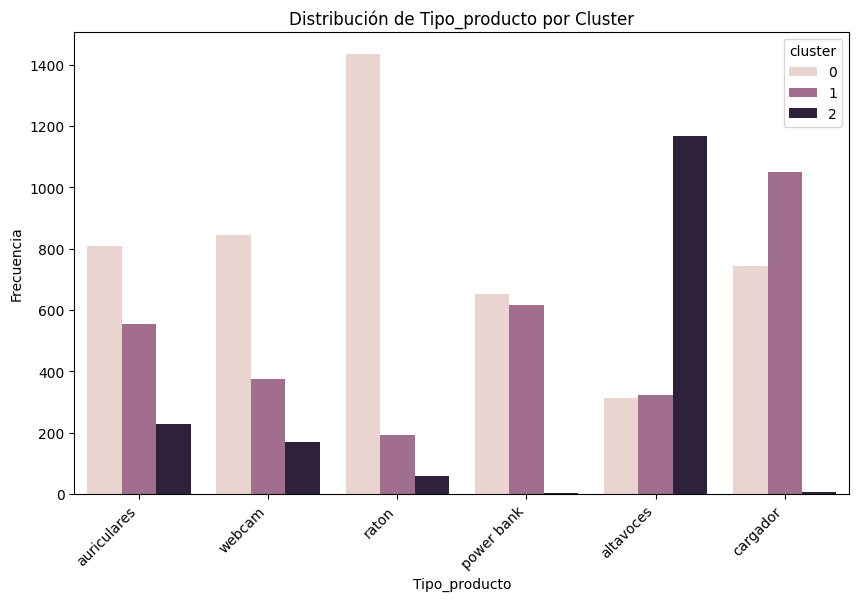

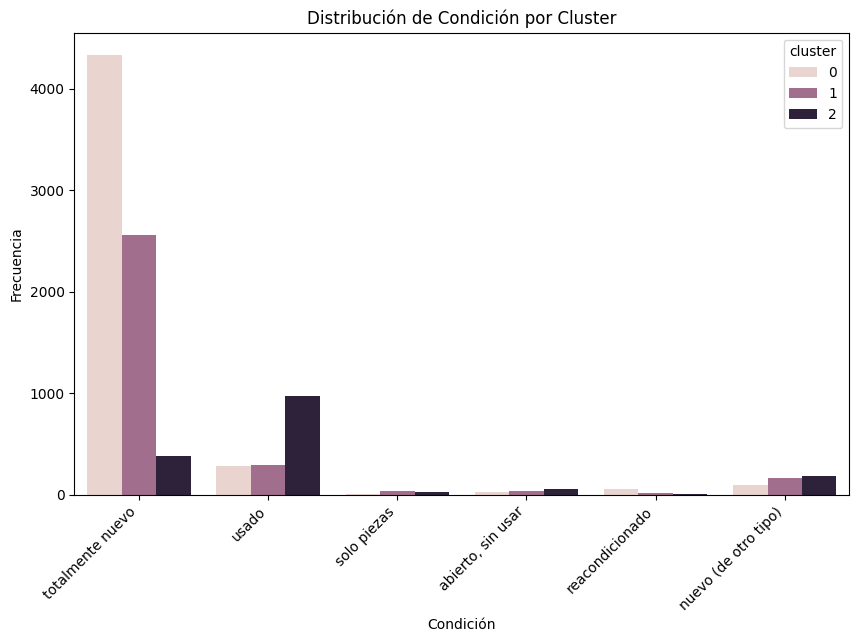

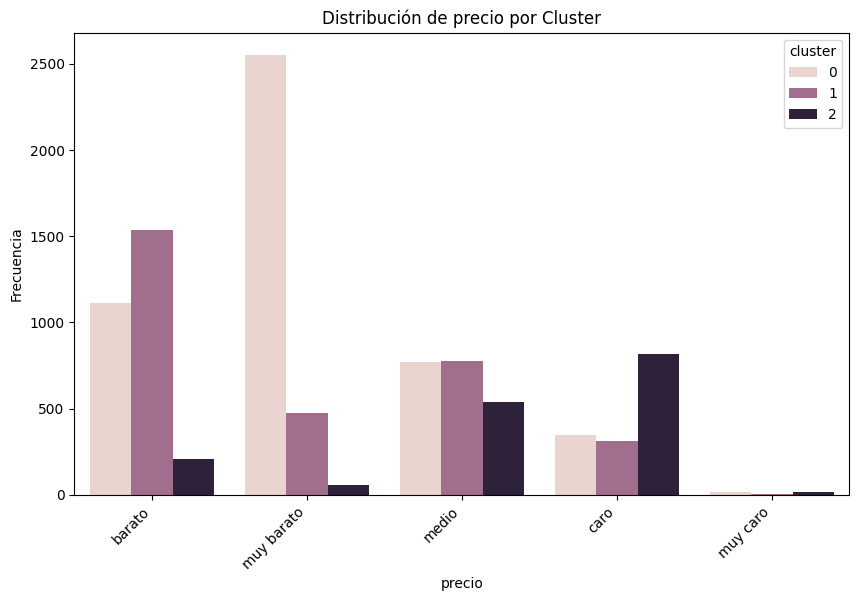

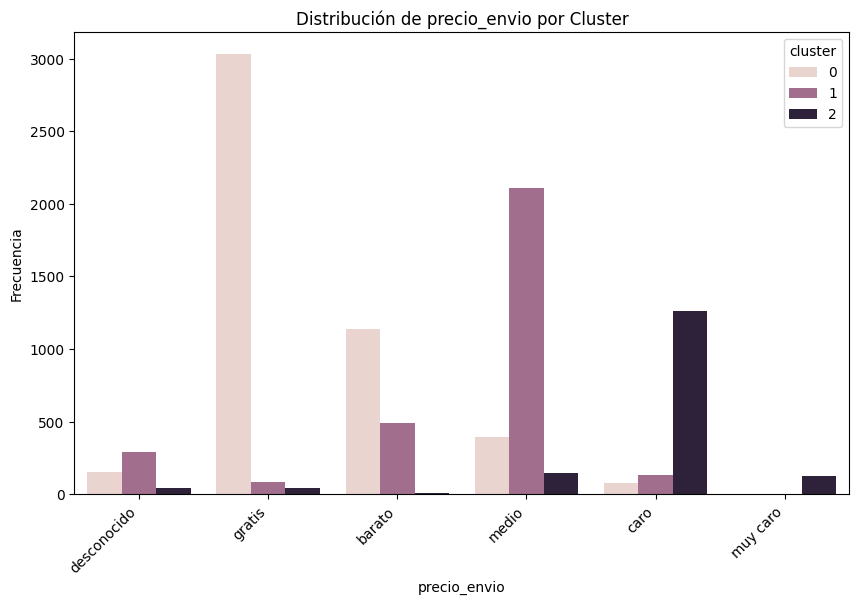

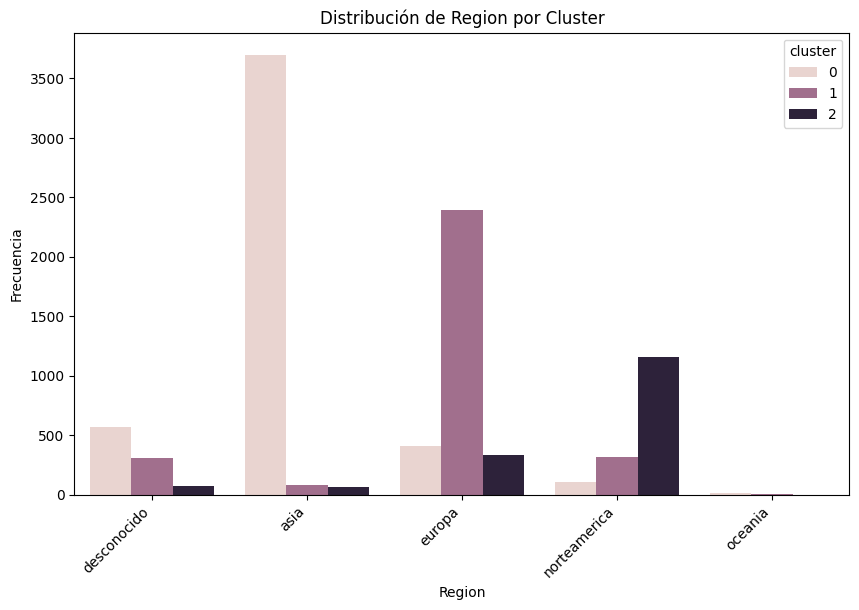

In [43]:
# Representacion grafica por cada atributo segun el cluster al que pertenecen

# df_kmeans_k3_huang
for column in df2_kmeans_k3_huang.columns:
  if column != 'cluster':
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='cluster', data=df2_kmeans_k3_huang)
    plt.title(f'Distribución de {column} por Cluster')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
    plt.show()